In [1]:
from jia_sims import *

In [2]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], model_dir='/global/scratch/avirukt/models/noiseless-3c5e5d4')
test_fn = input_fn("noiseless",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless-3c5e5d4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b5ca9dde3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


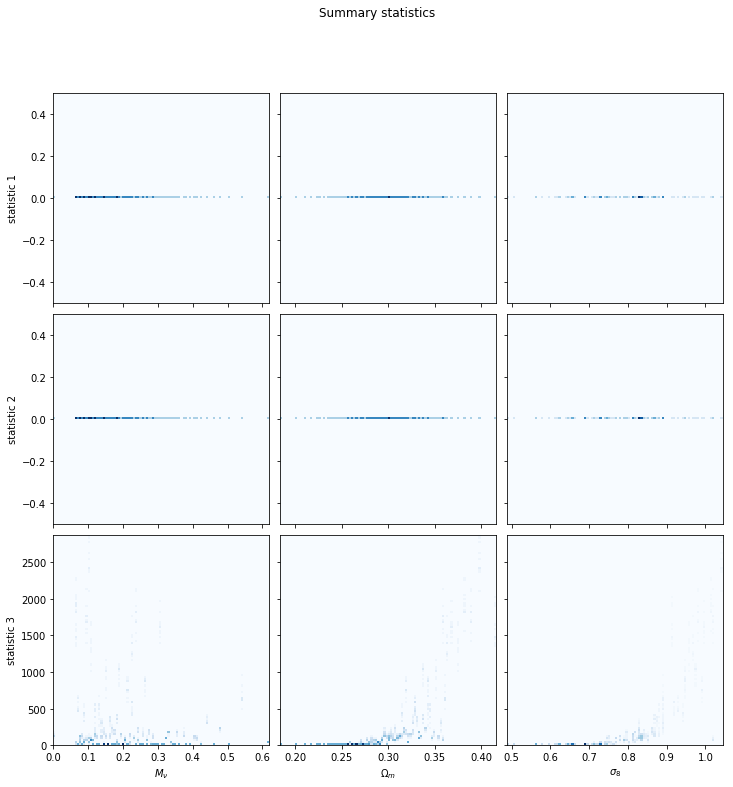

In [3]:
model.plot_summaries(testing_fn=test_fn,p=tp)

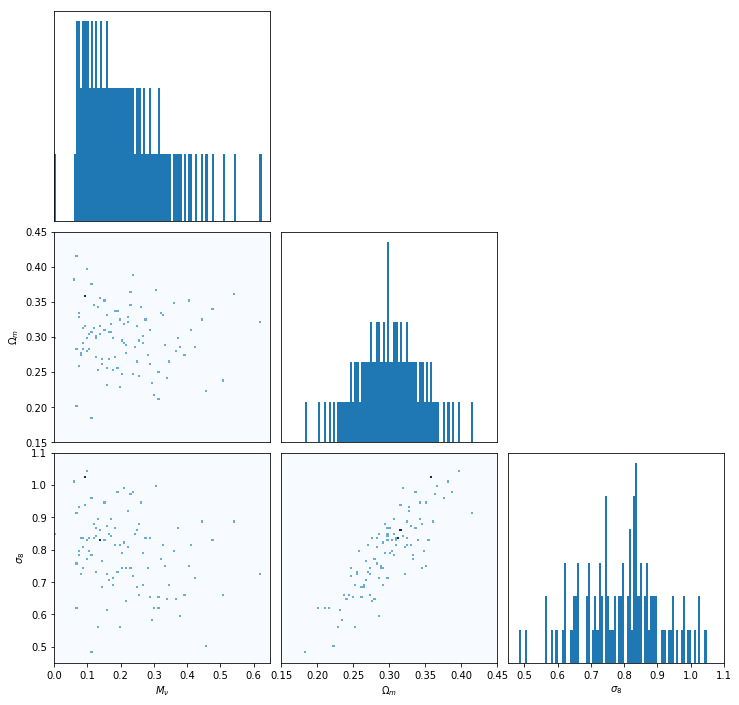

In [4]:
triangle_plot(p, model.labels, bounds=bounds)

In [5]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


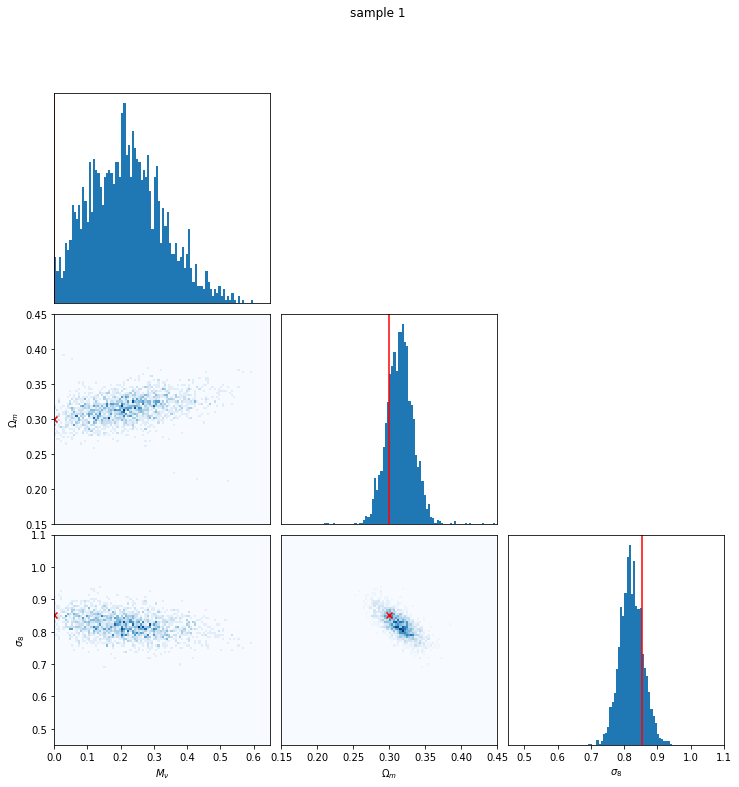

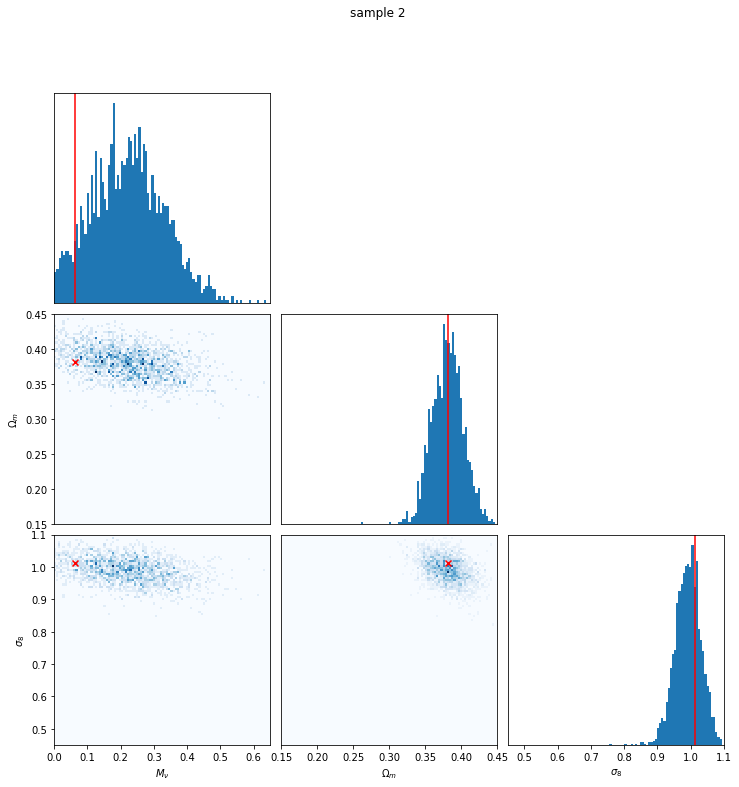

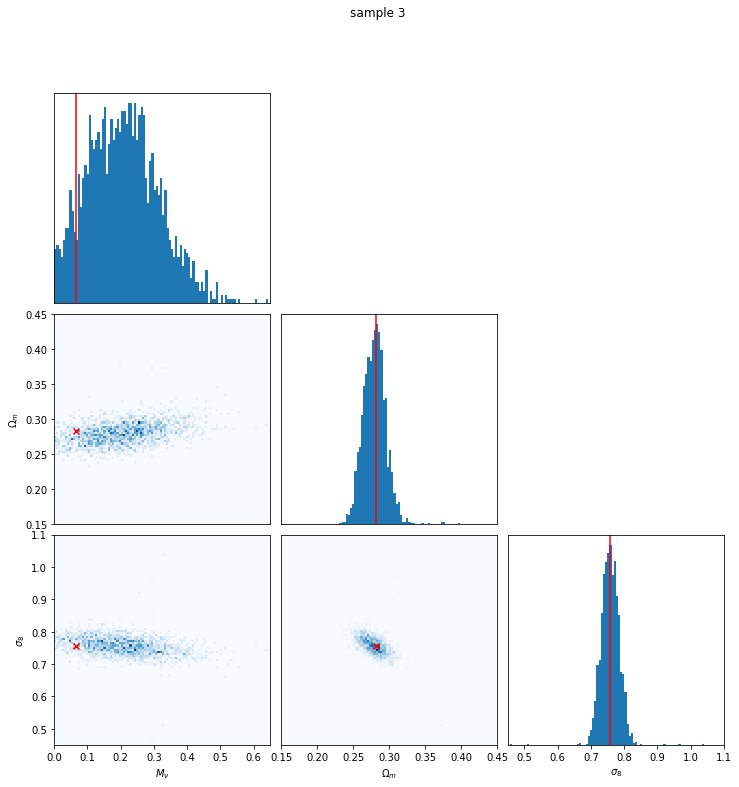

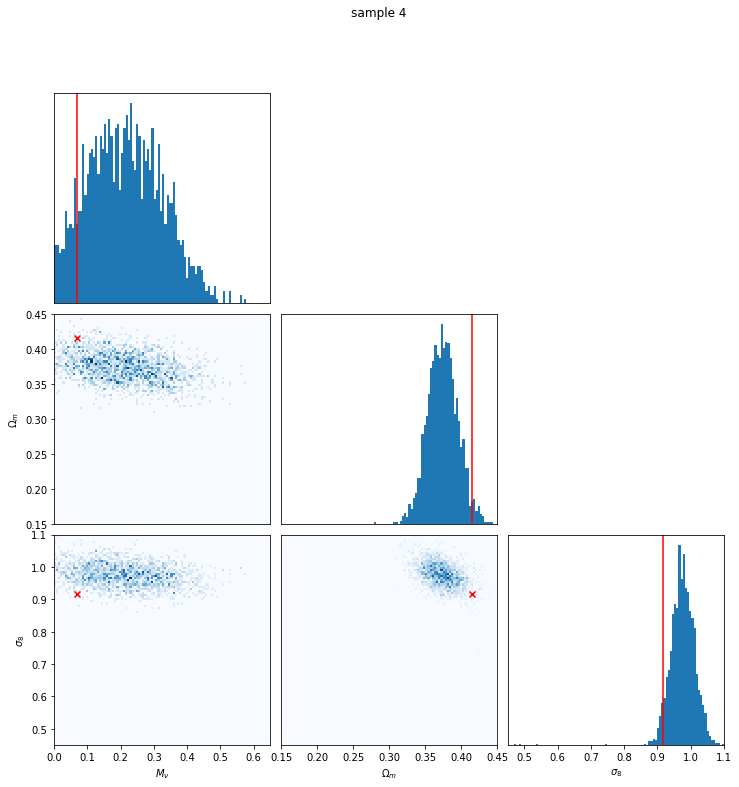

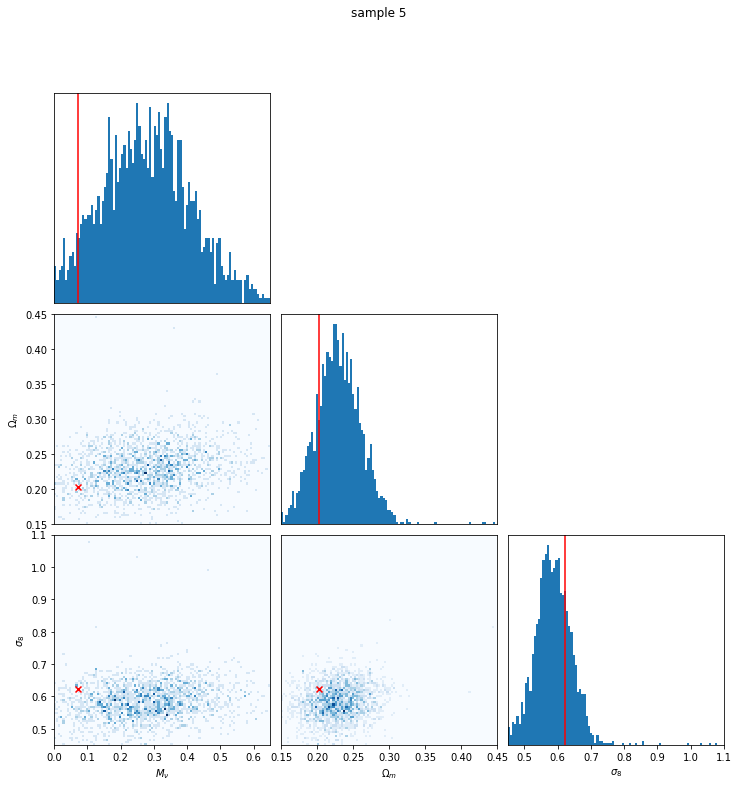

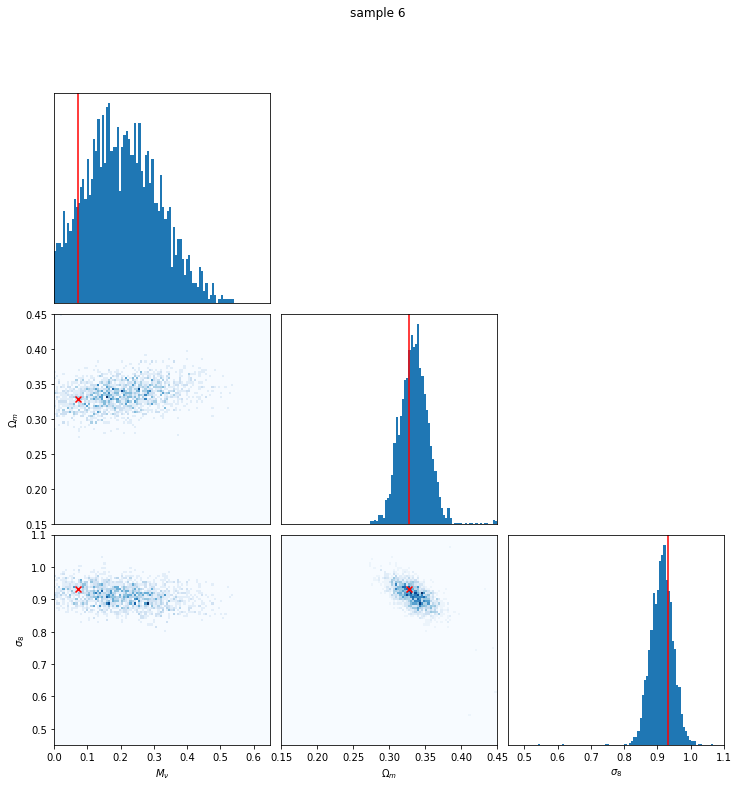

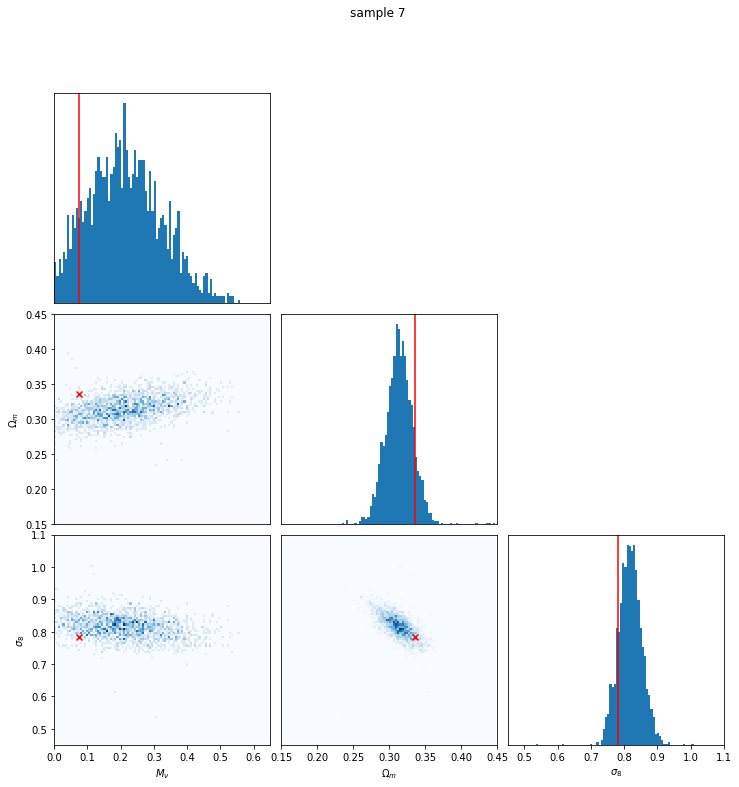

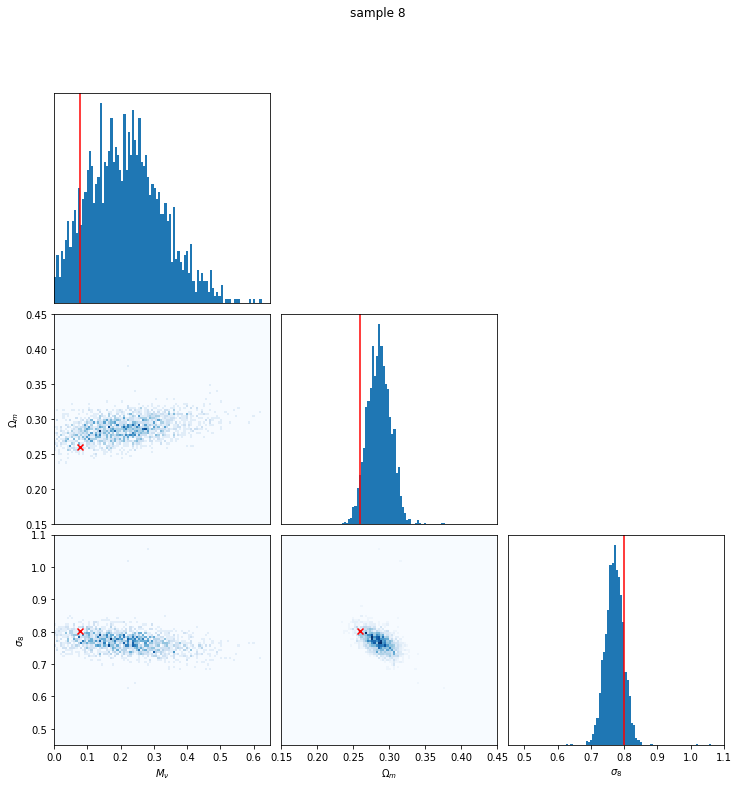

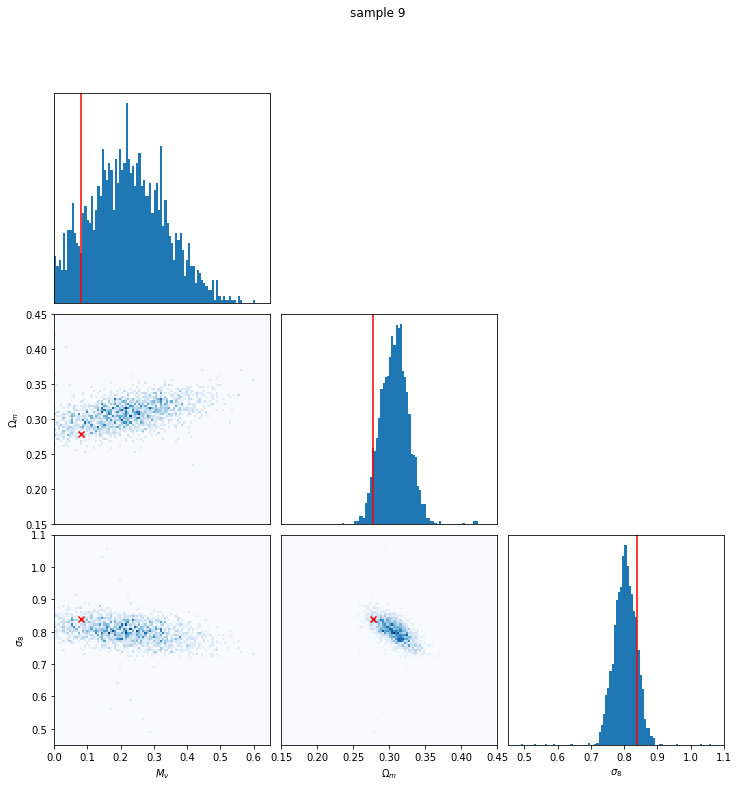

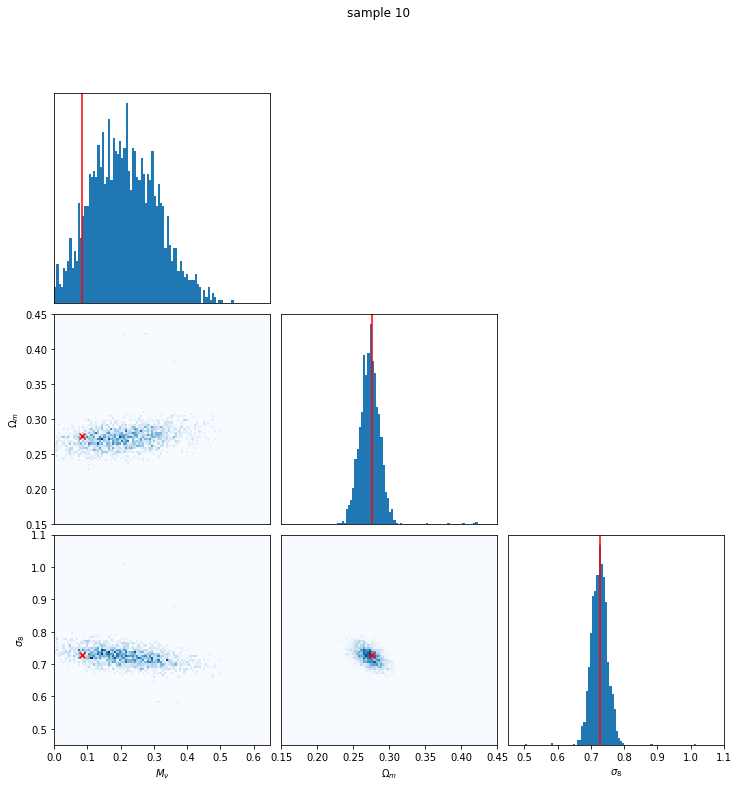

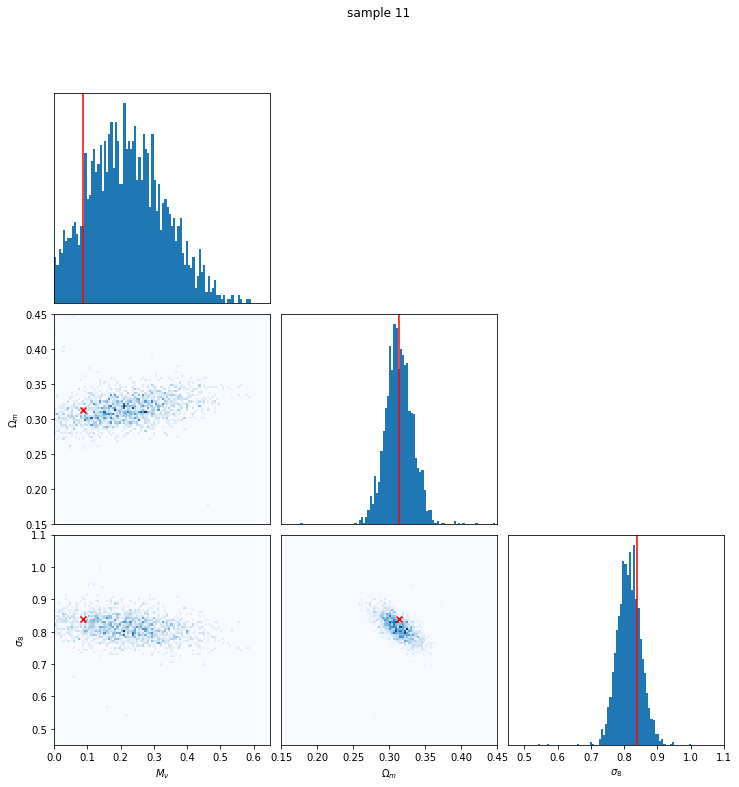

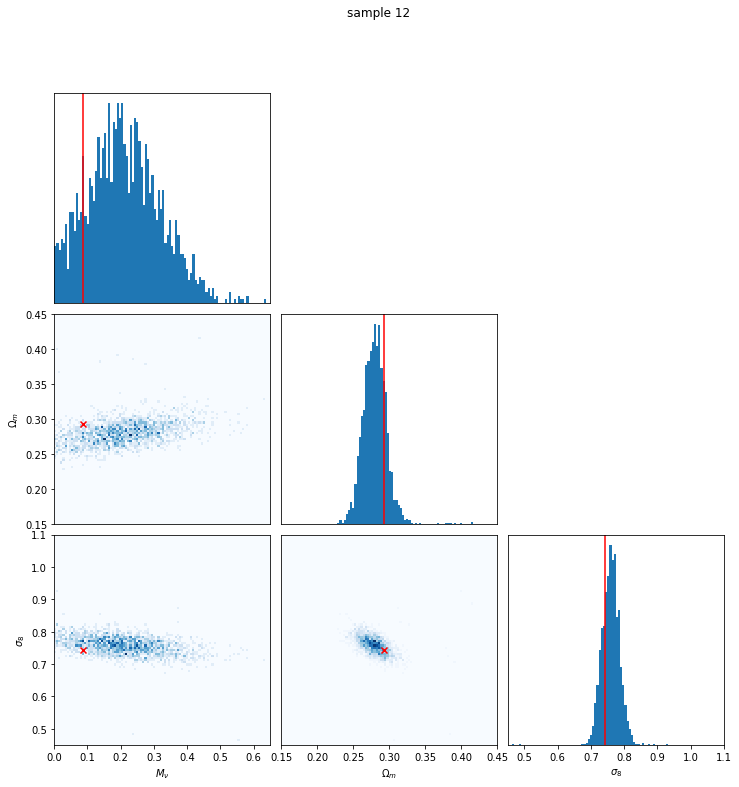

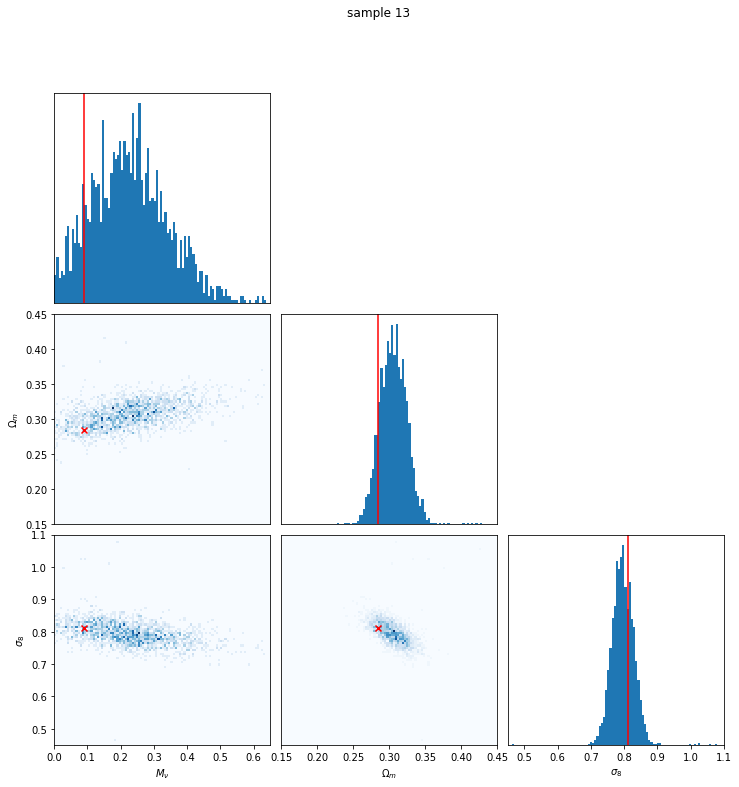

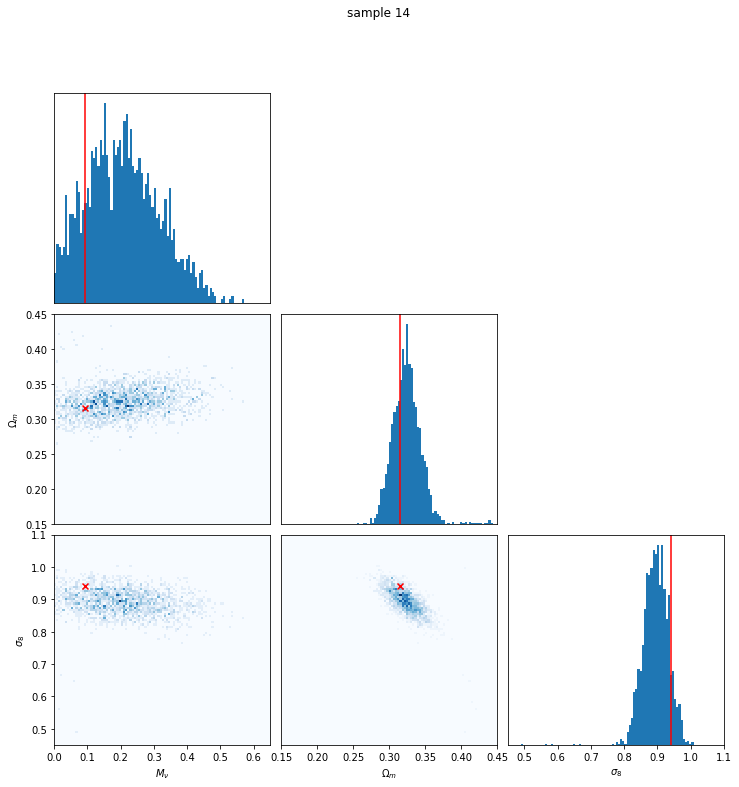

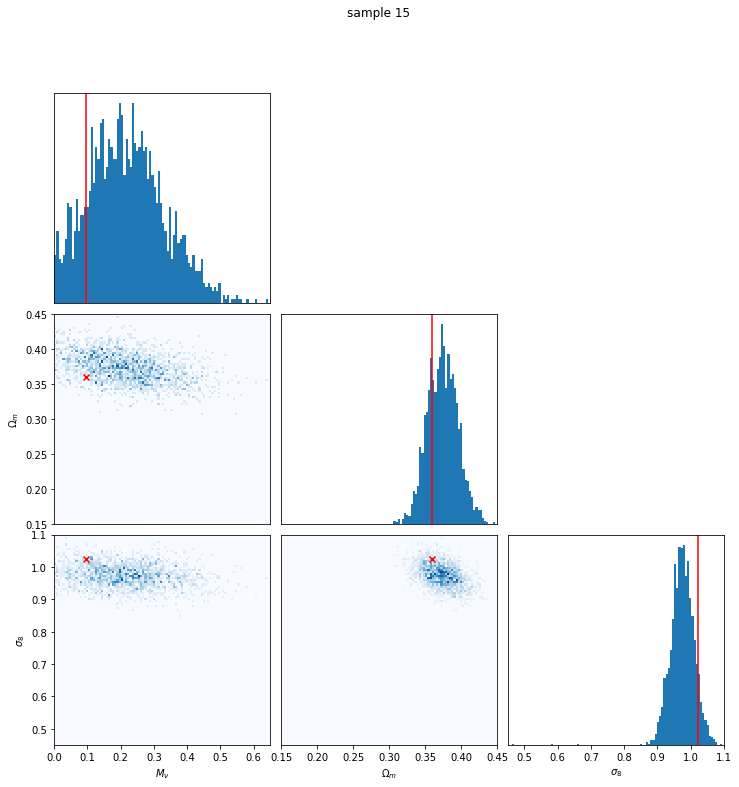

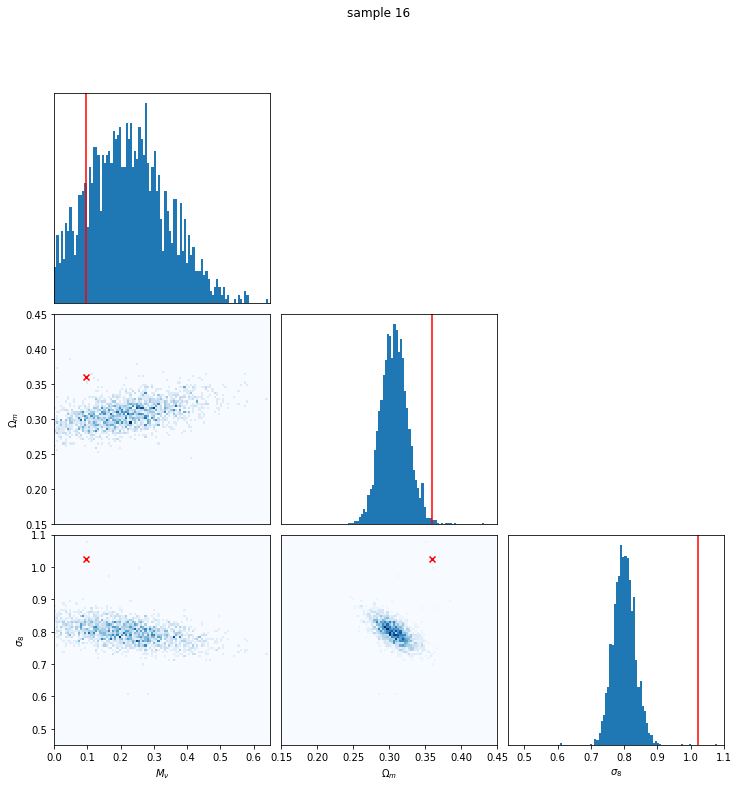

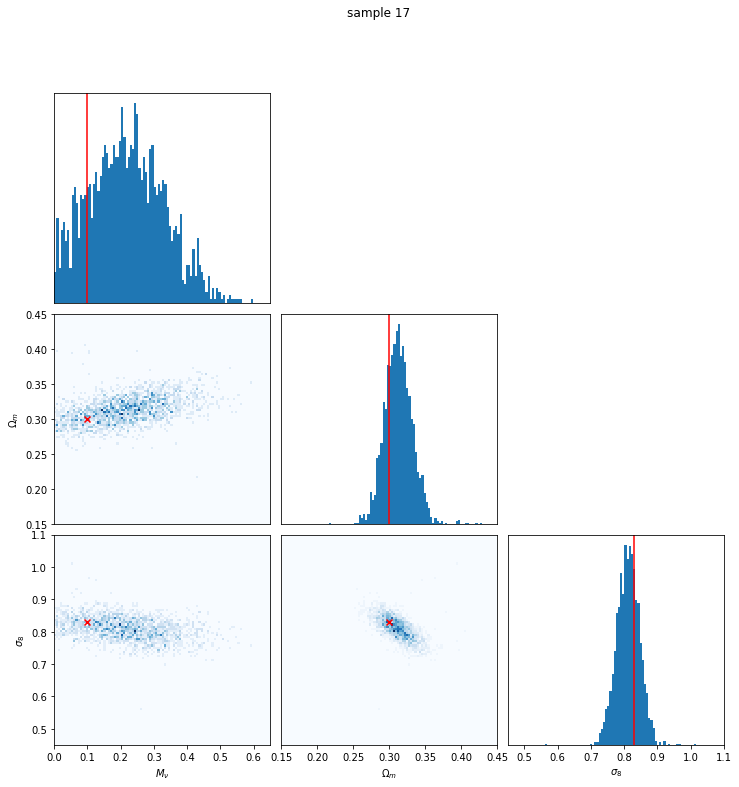

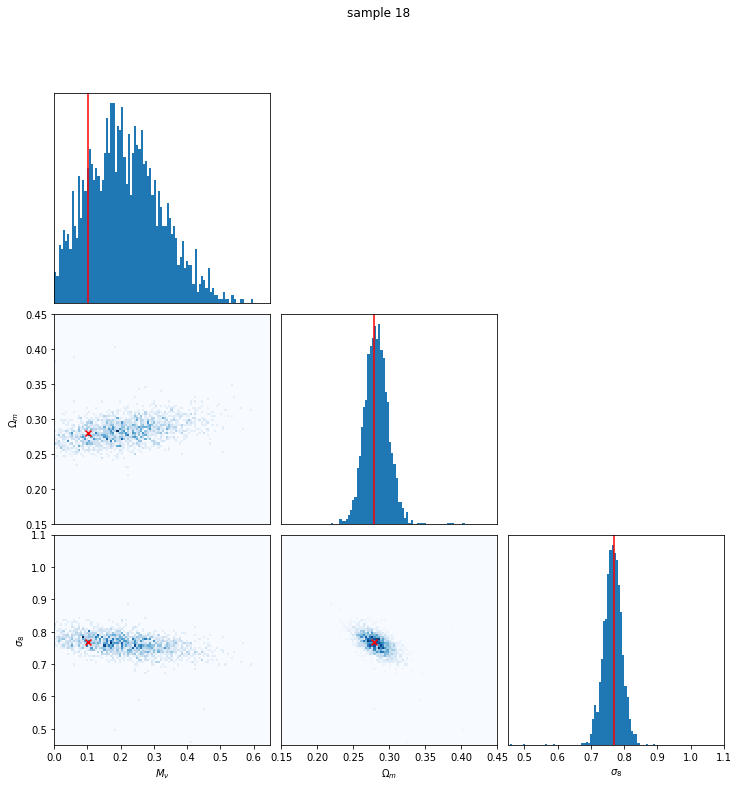

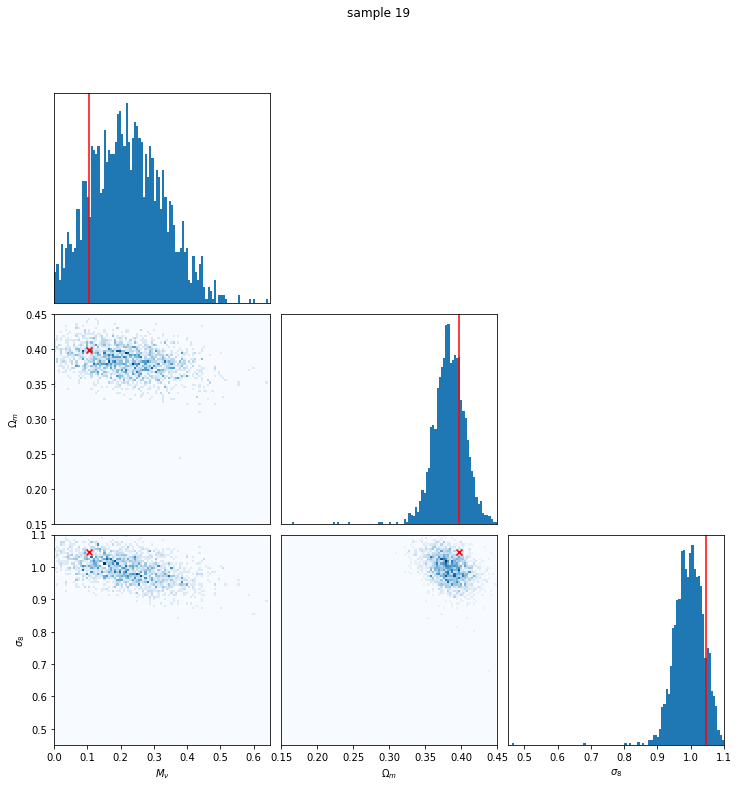

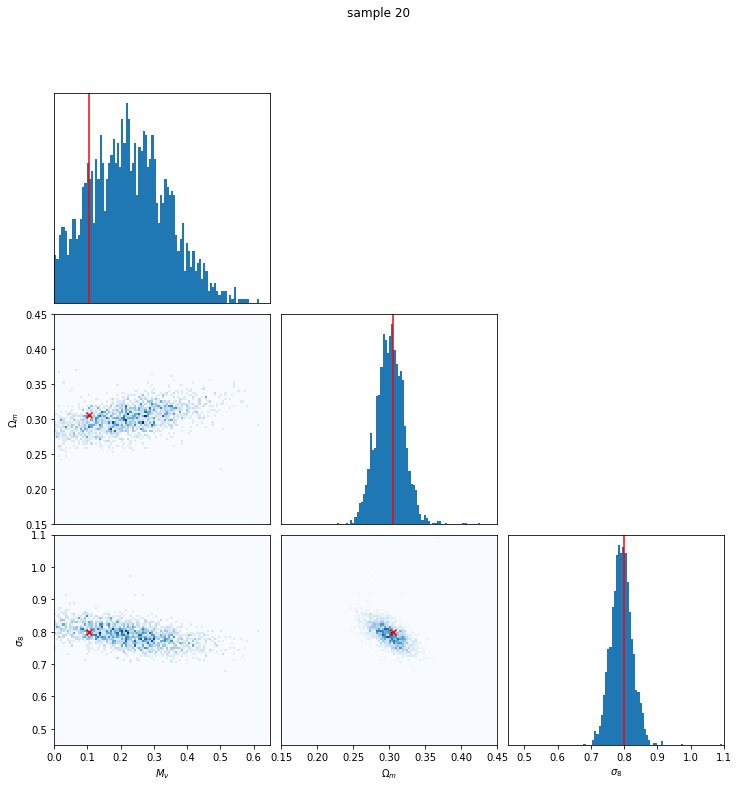

In [6]:
for i in range(20):
    next(post)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


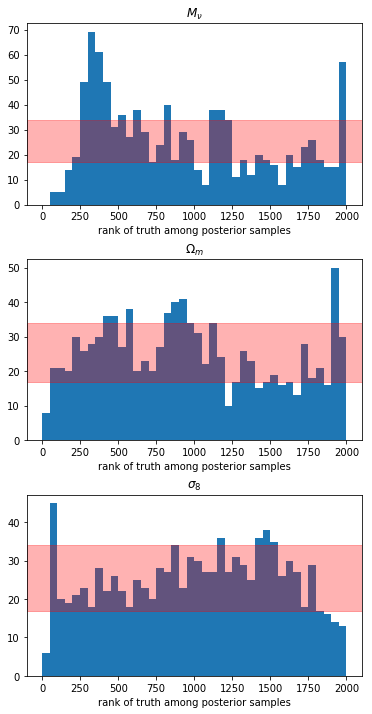

In [7]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [8]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], model_dir='/global/scratch/avirukt/models/noiseless_gaussian-3c5e5d4')
test_fn = input_fn("noiseless_gaussian",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless_gaussian-3c5e5d4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b5ebfa9c0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


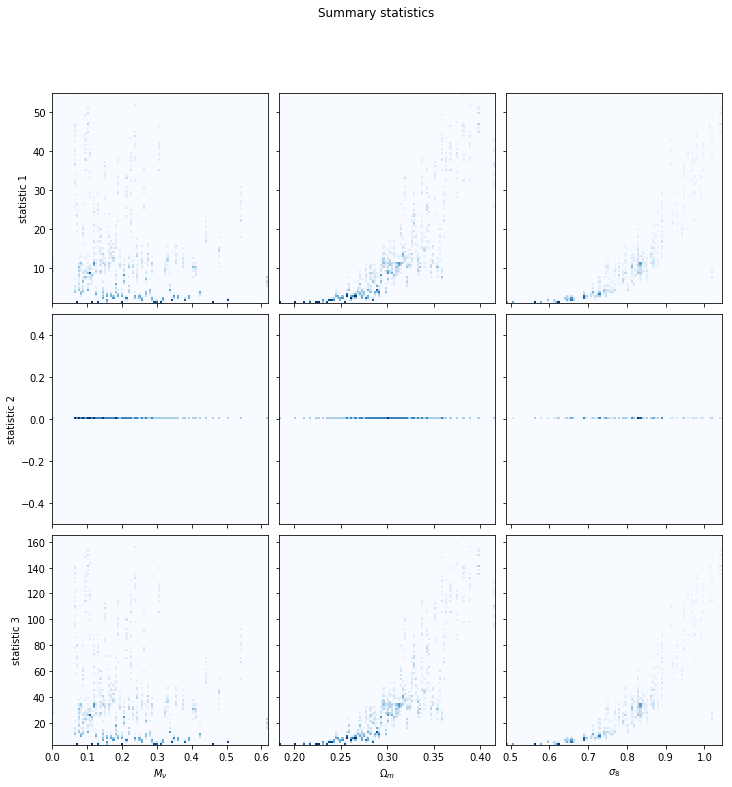

In [9]:
model.plot_summaries(testing_fn=test_fn,p=tp)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


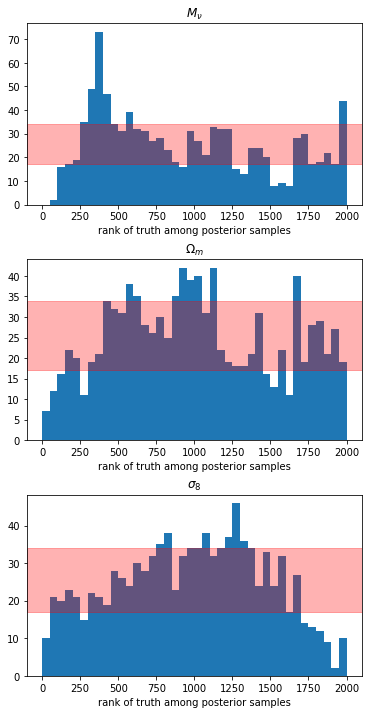

In [10]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [11]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-3c5e5d4/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


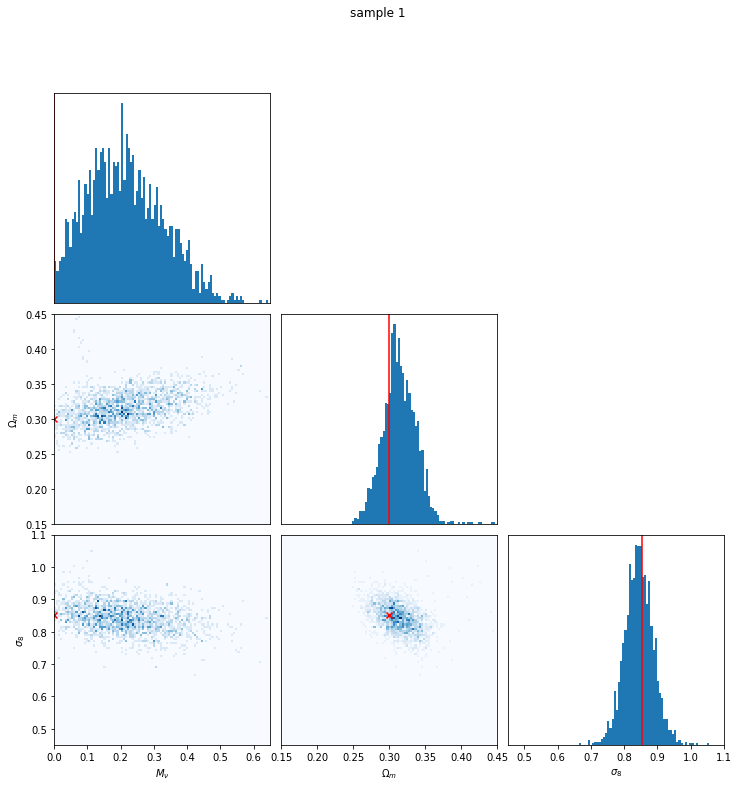

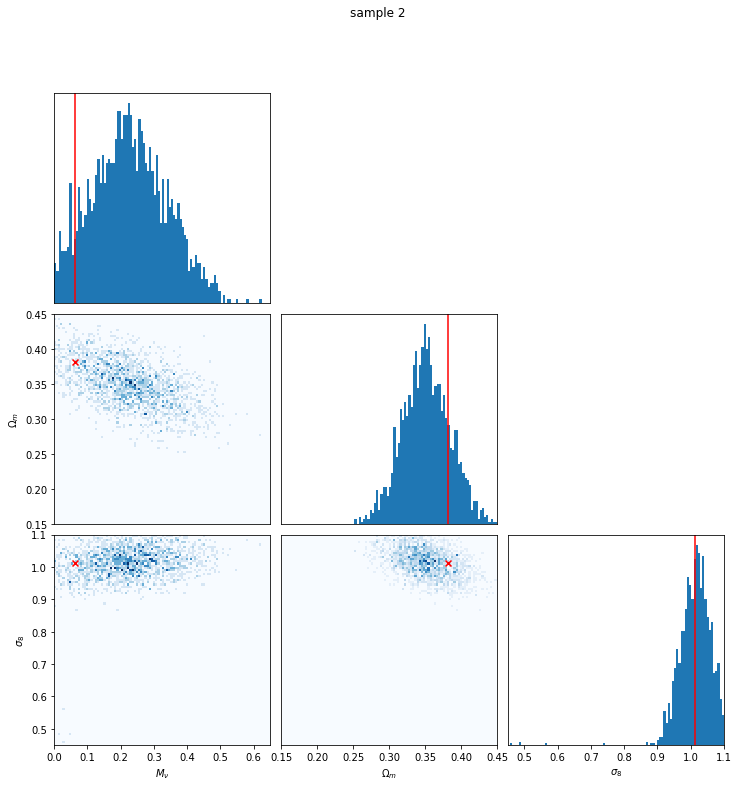

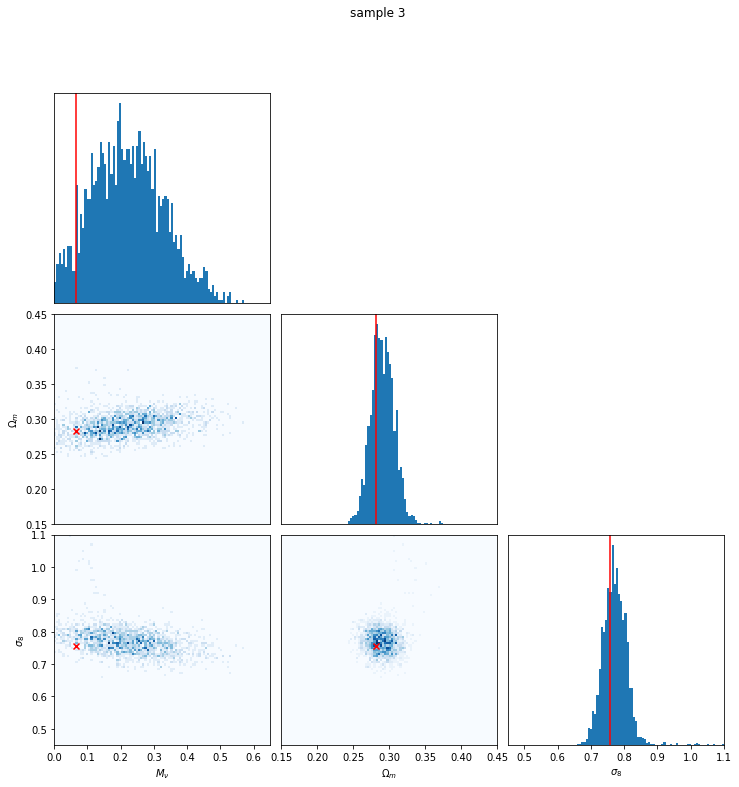

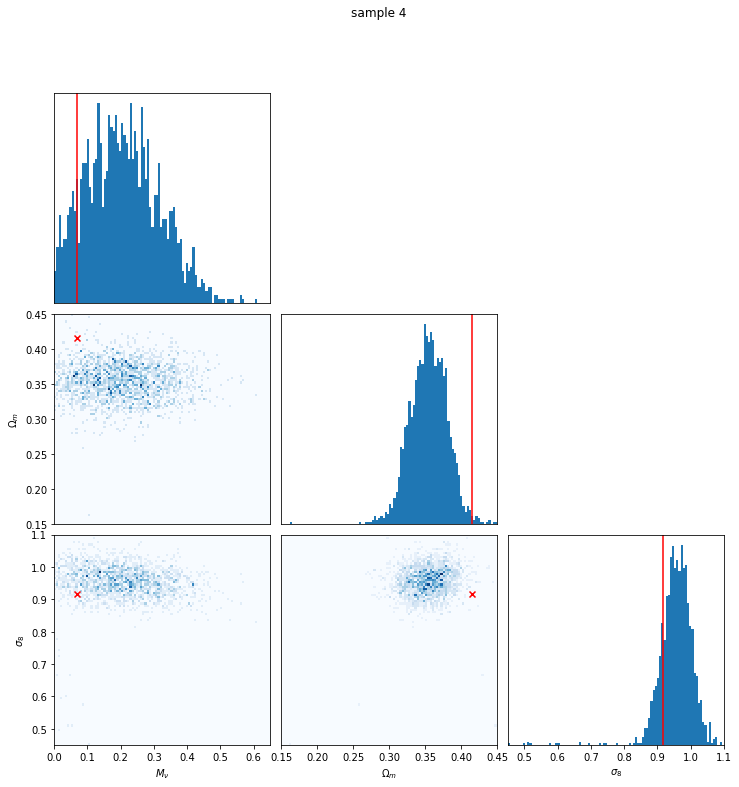

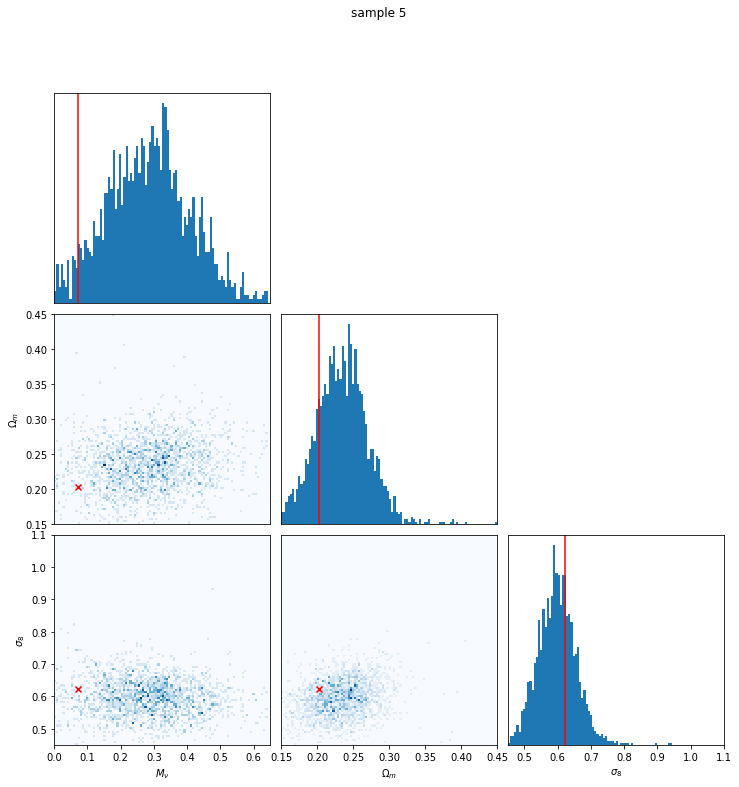

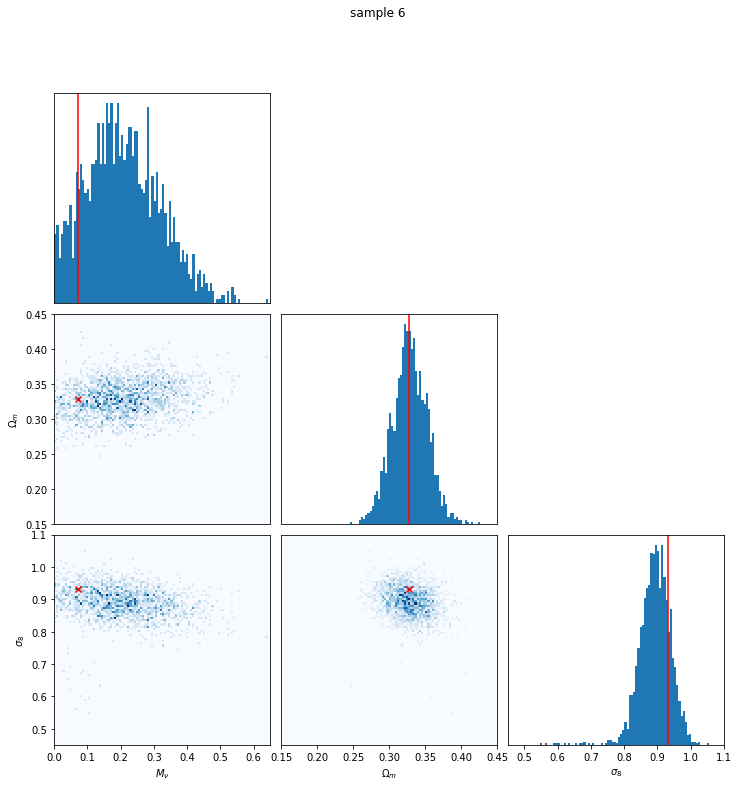

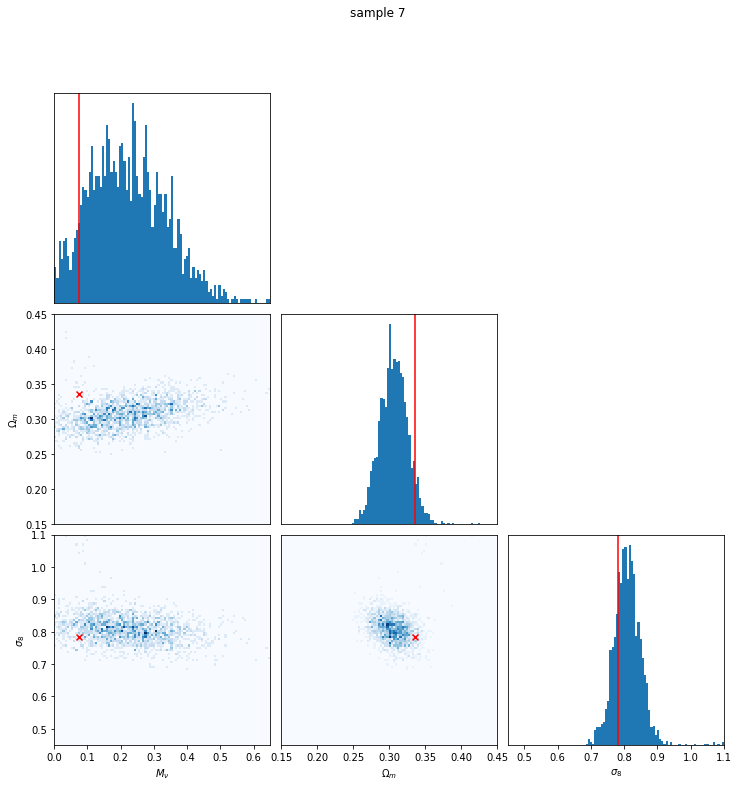

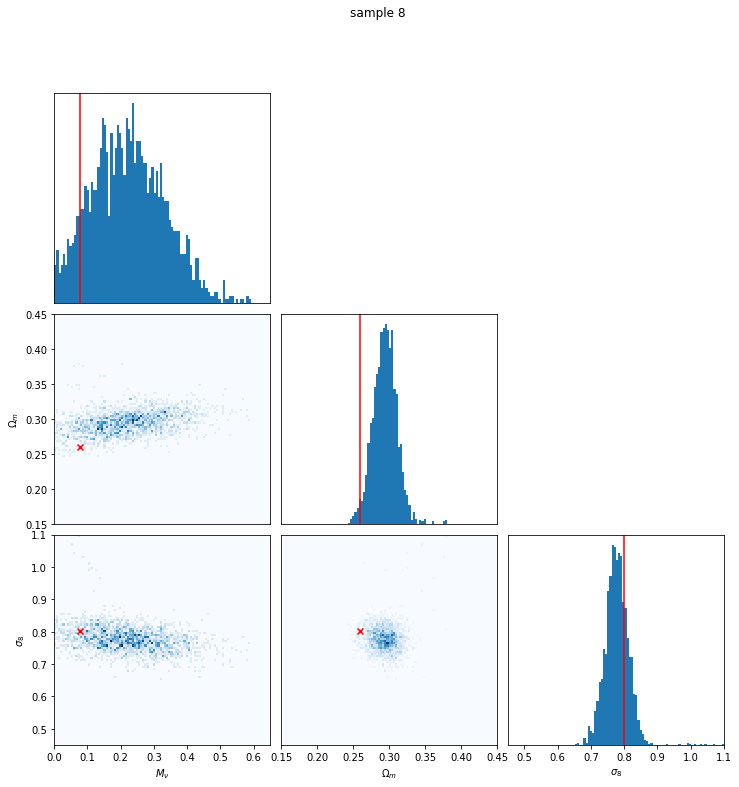

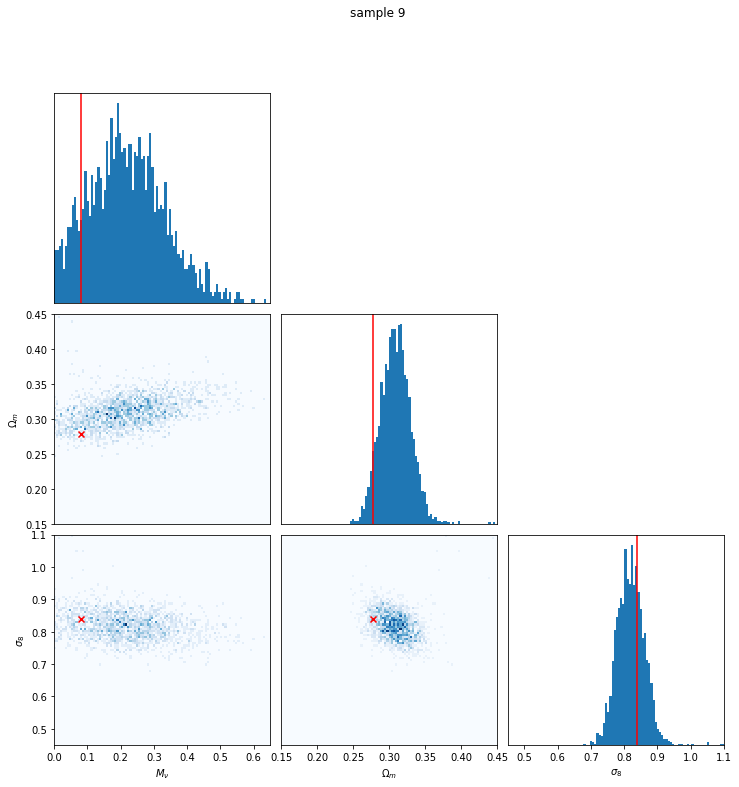

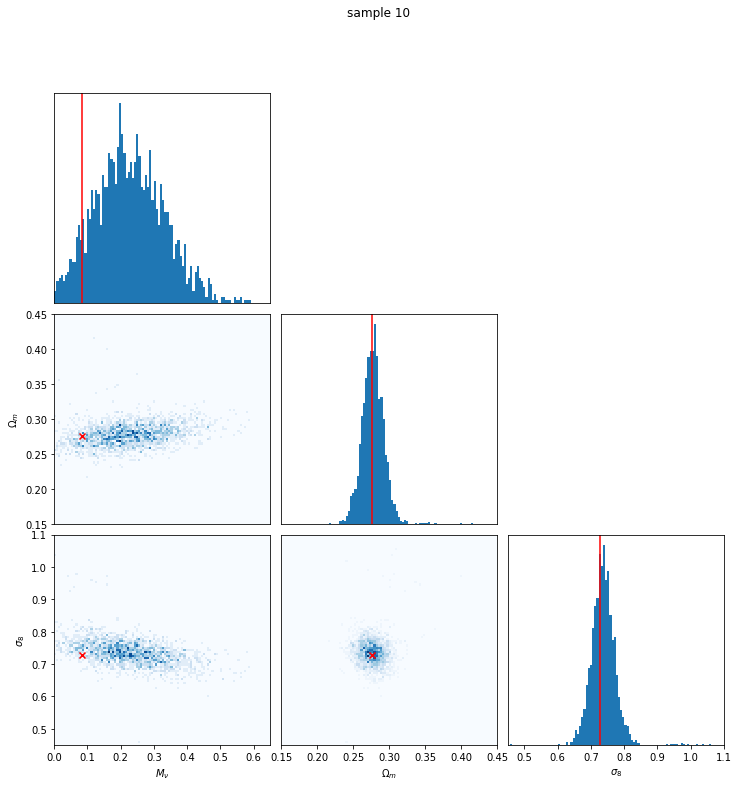

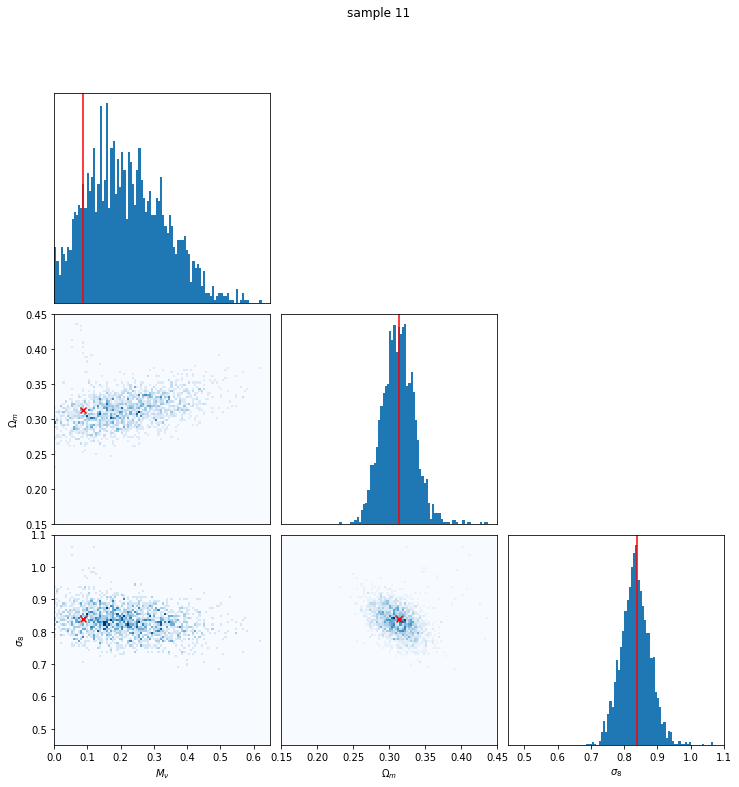

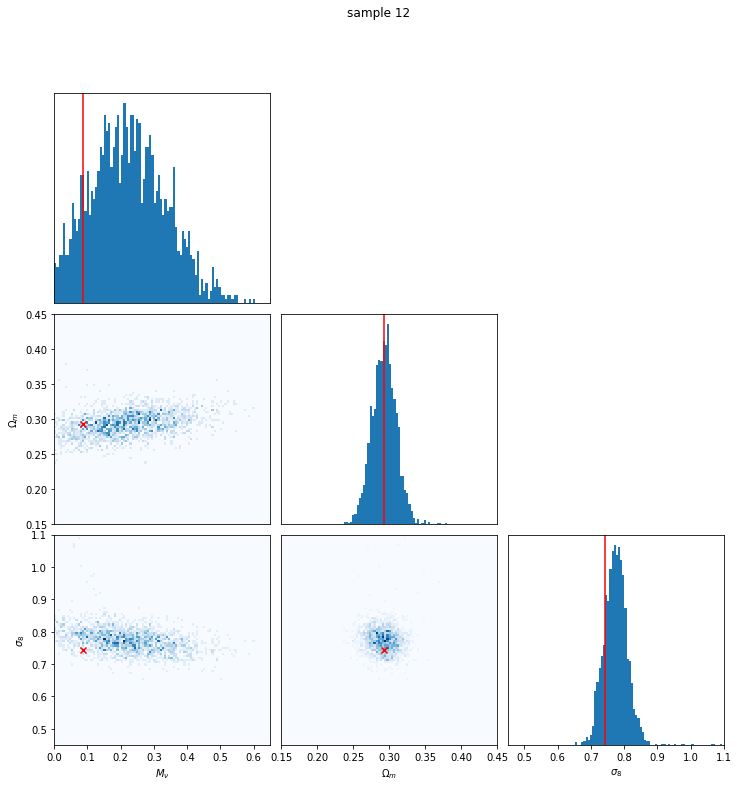

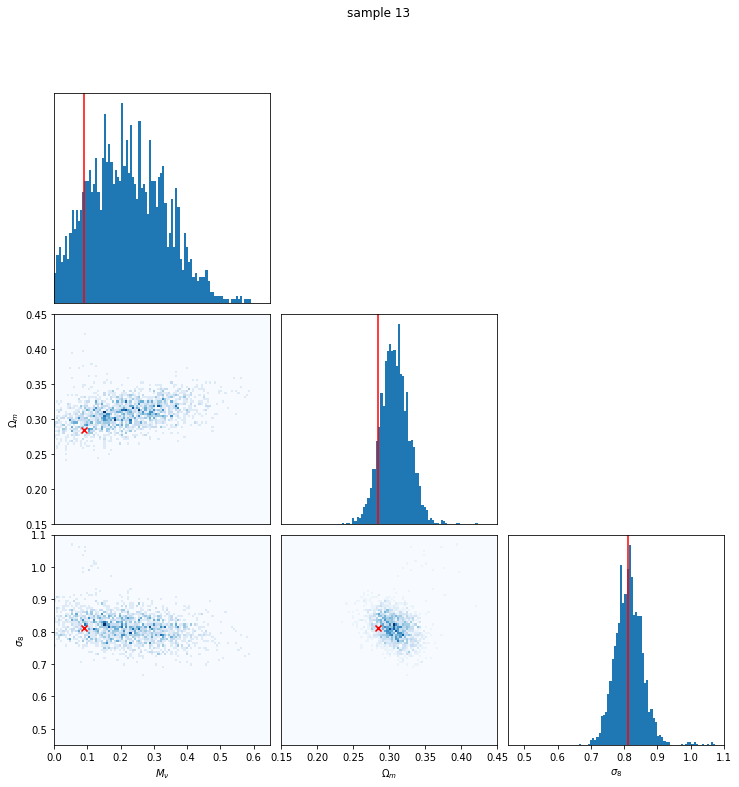

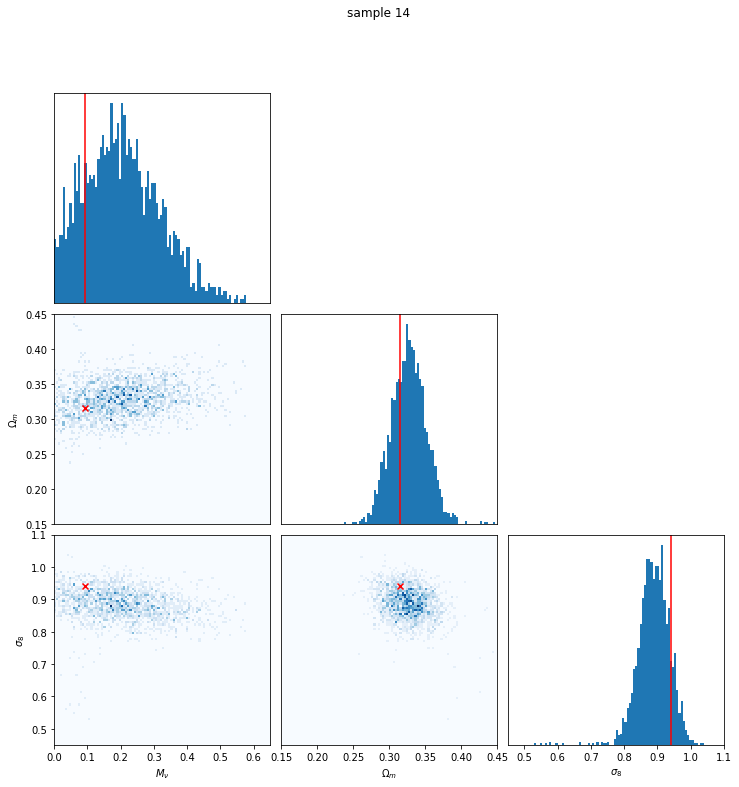

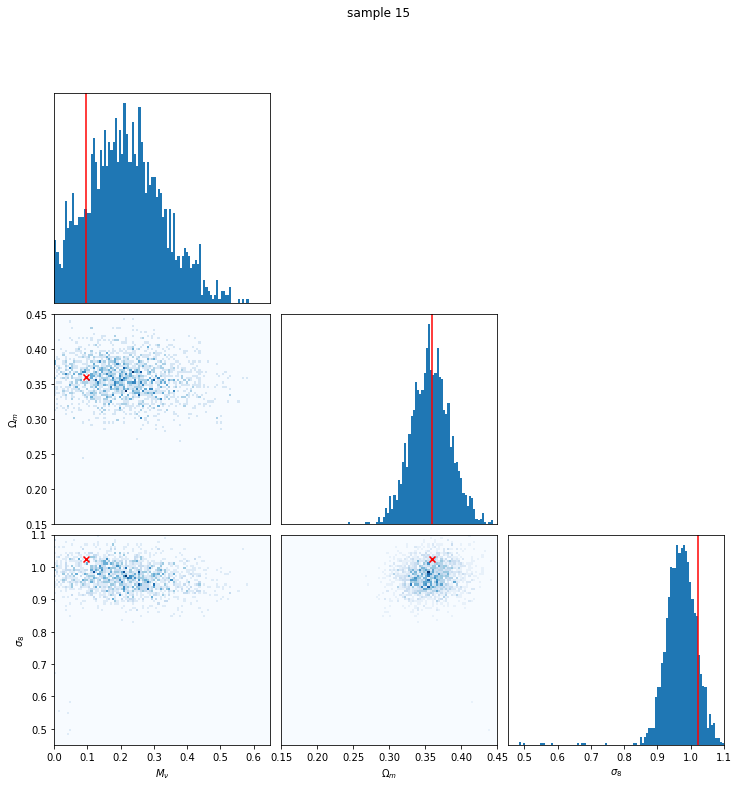

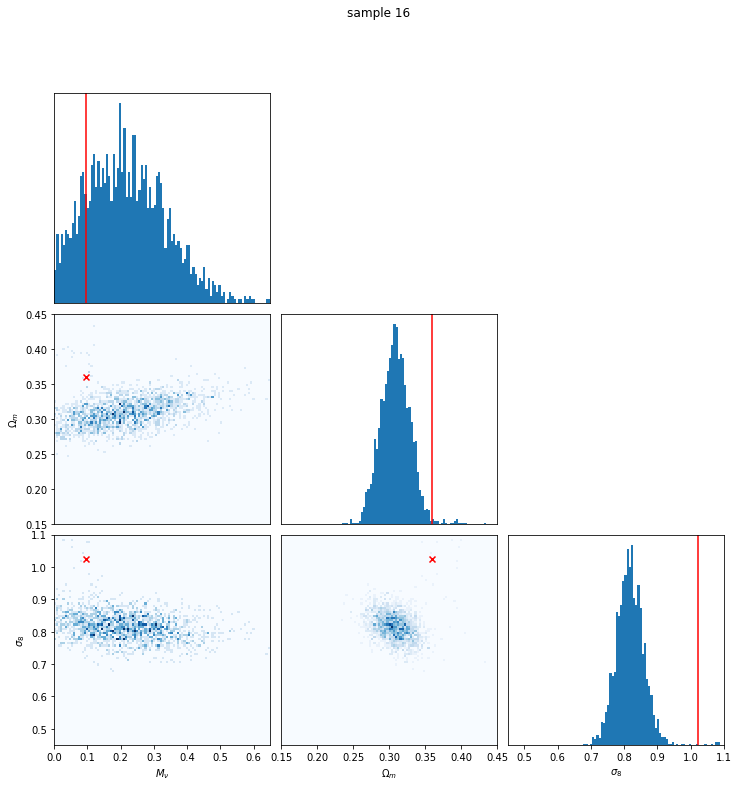

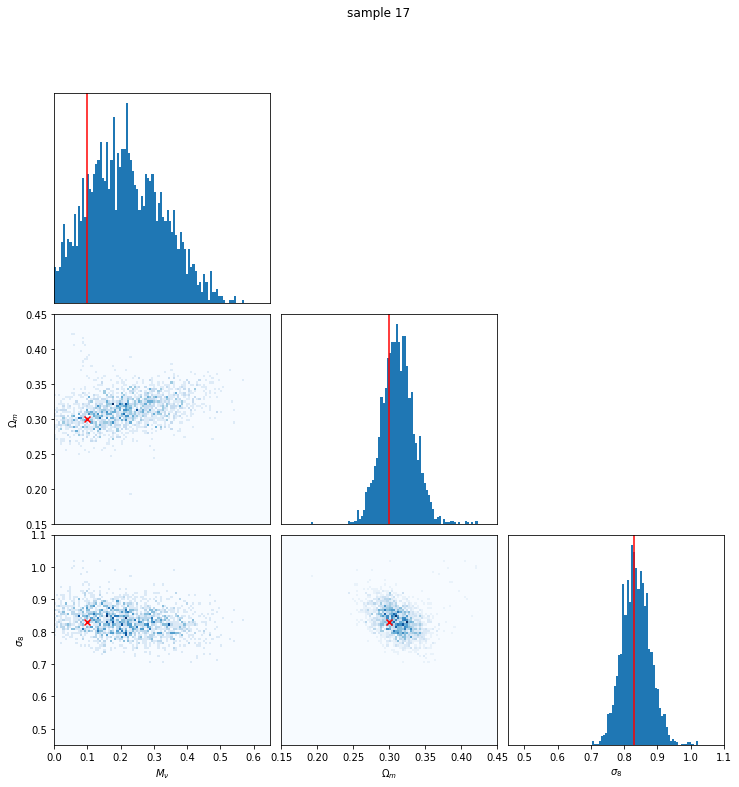

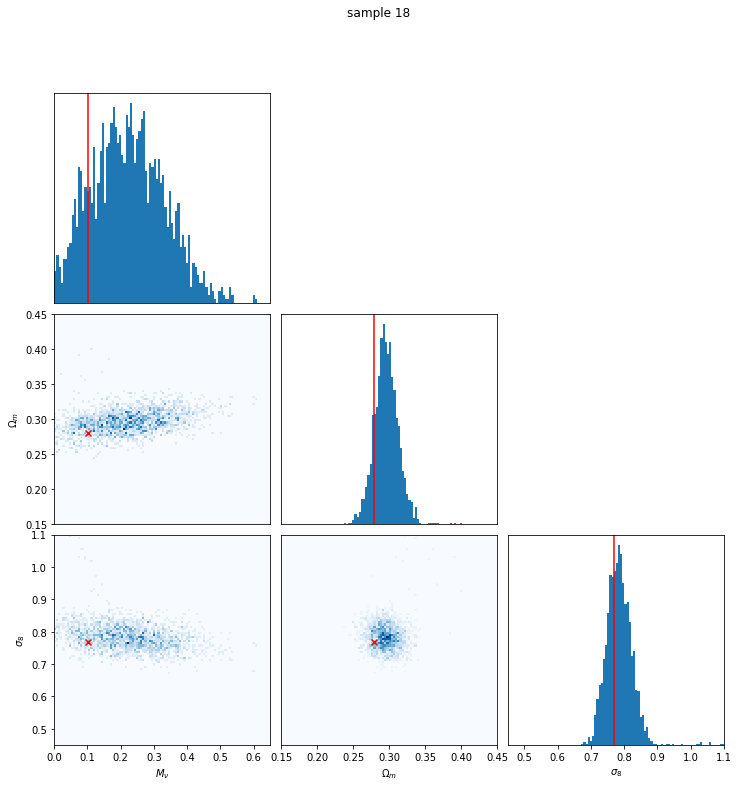

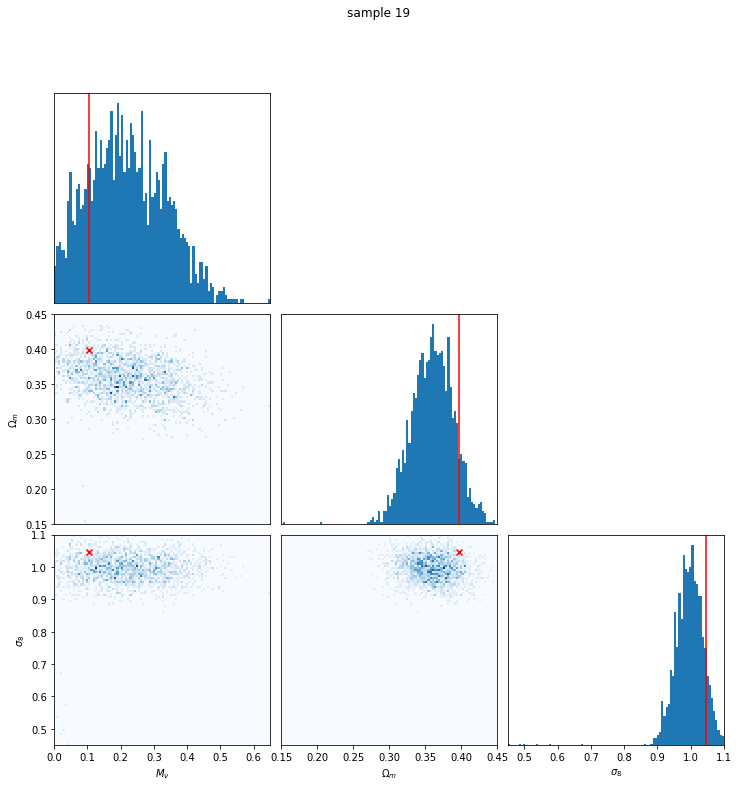

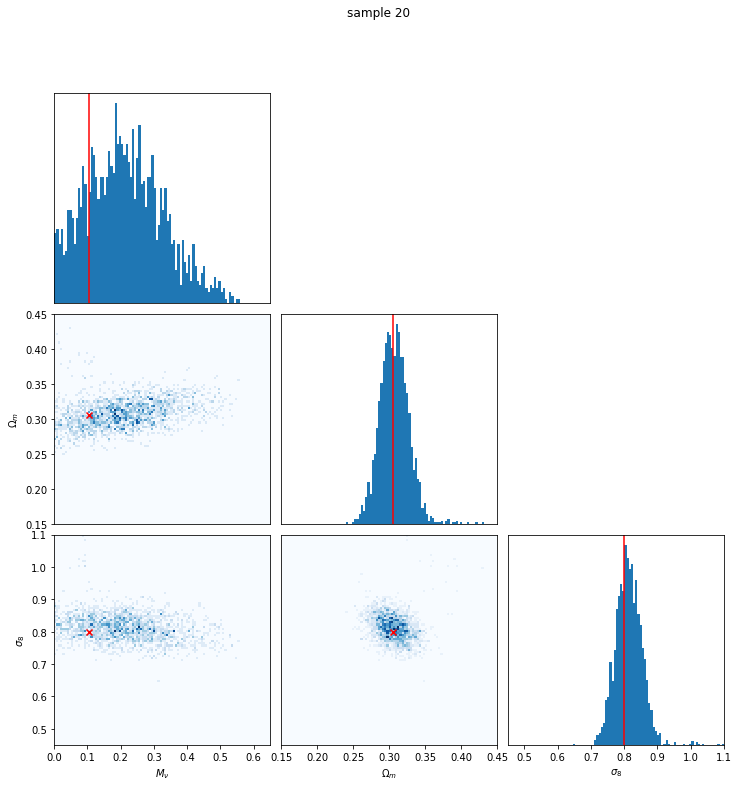

In [12]:
for i in range(20):
    next(post)

In [13]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], model_dir='/global/scratch/avirukt/models/noiseless_whitened-c3928c8')
test_fn = input_fn("noiseless_gaussian",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless_whitened-c3928c8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b5e5ad056a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-c3928c8/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


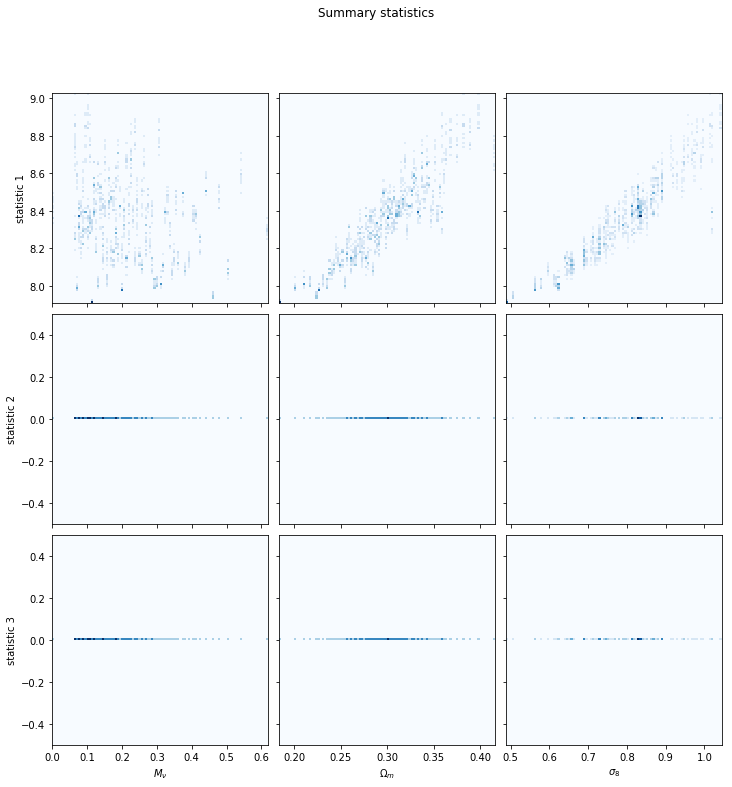

In [14]:
model.plot_summaries(testing_fn=test_fn,p=tp)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-c3928c8/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


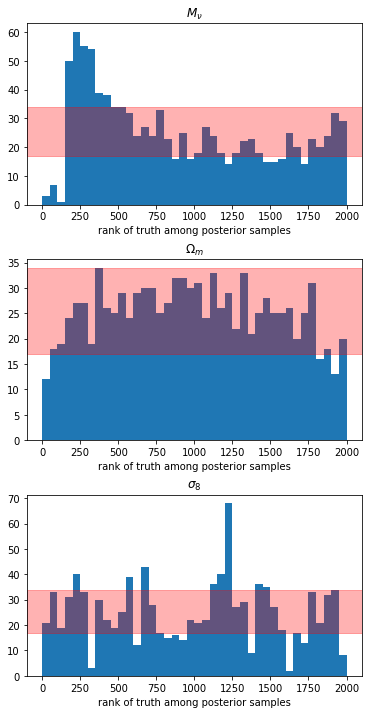

In [15]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [16]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
256 2 1
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-c3928c8/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


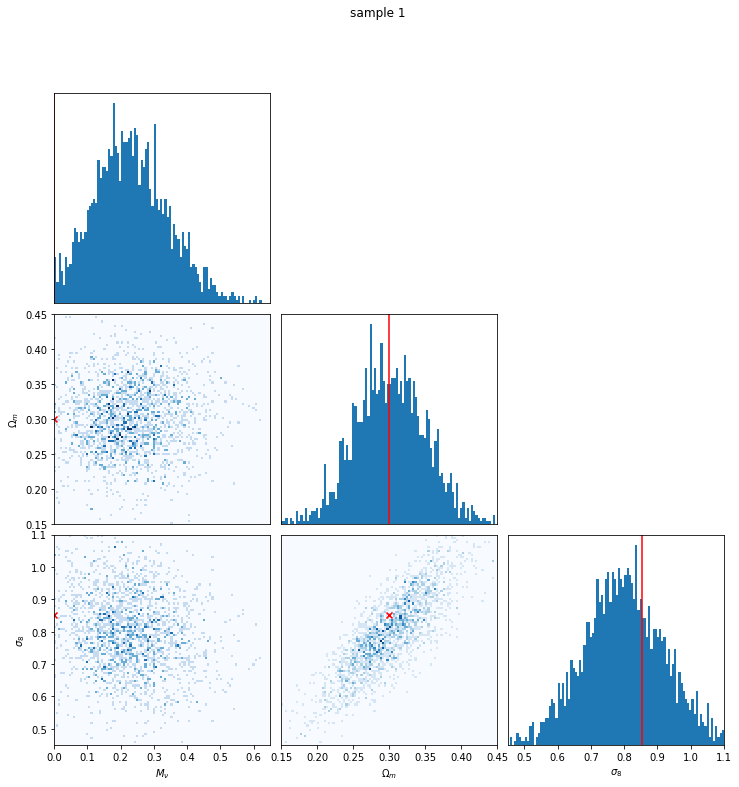

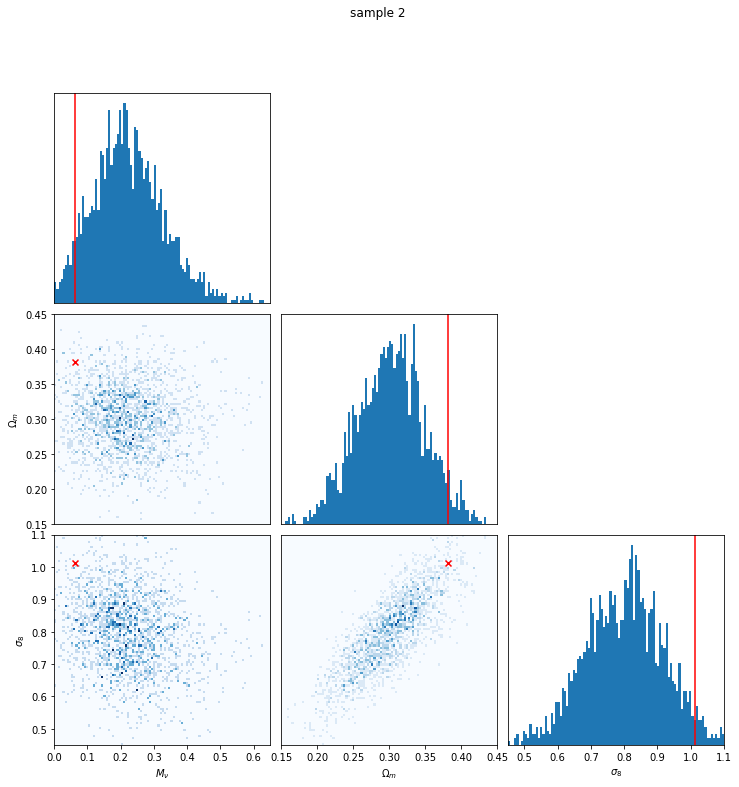

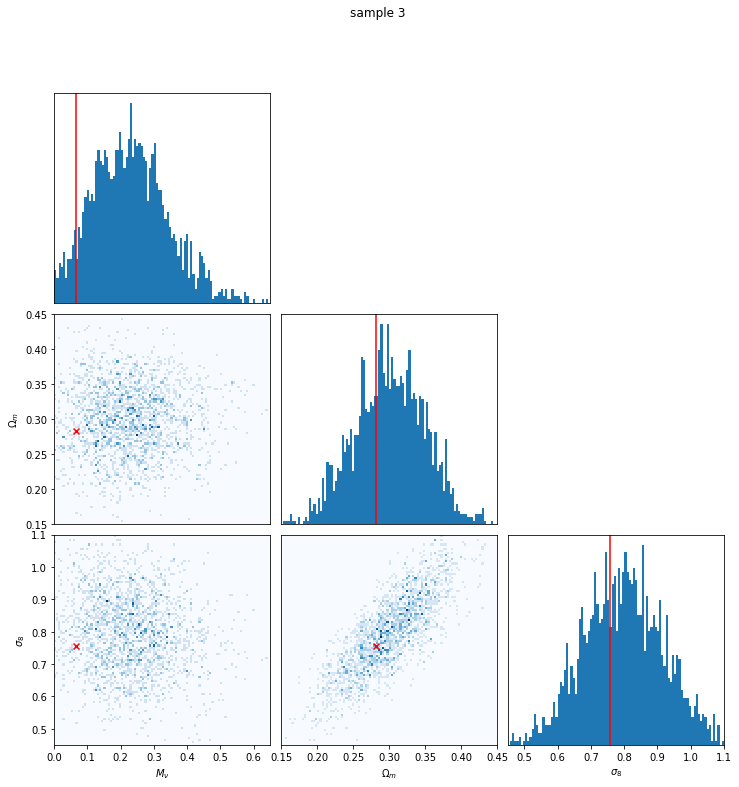

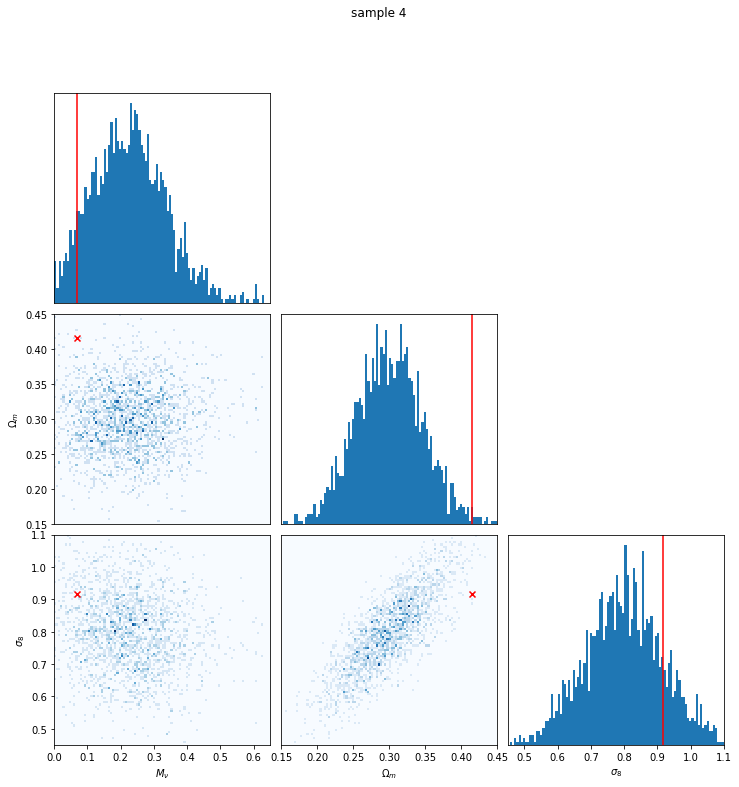

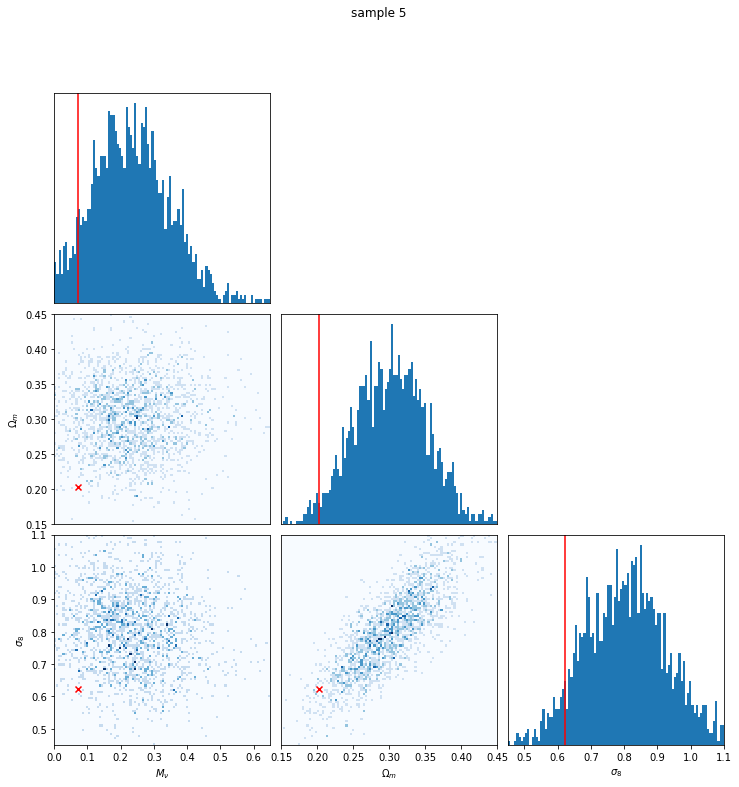

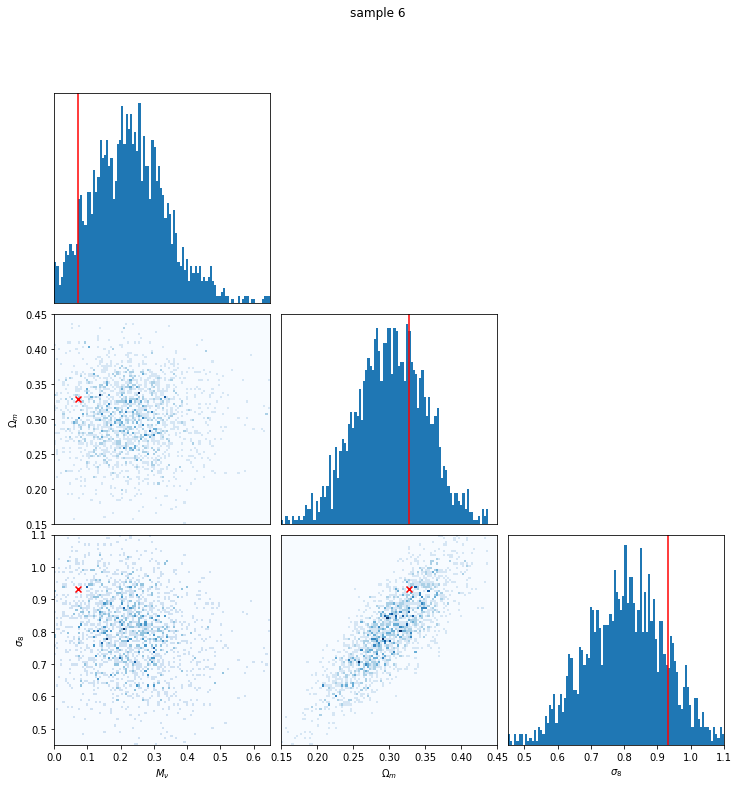

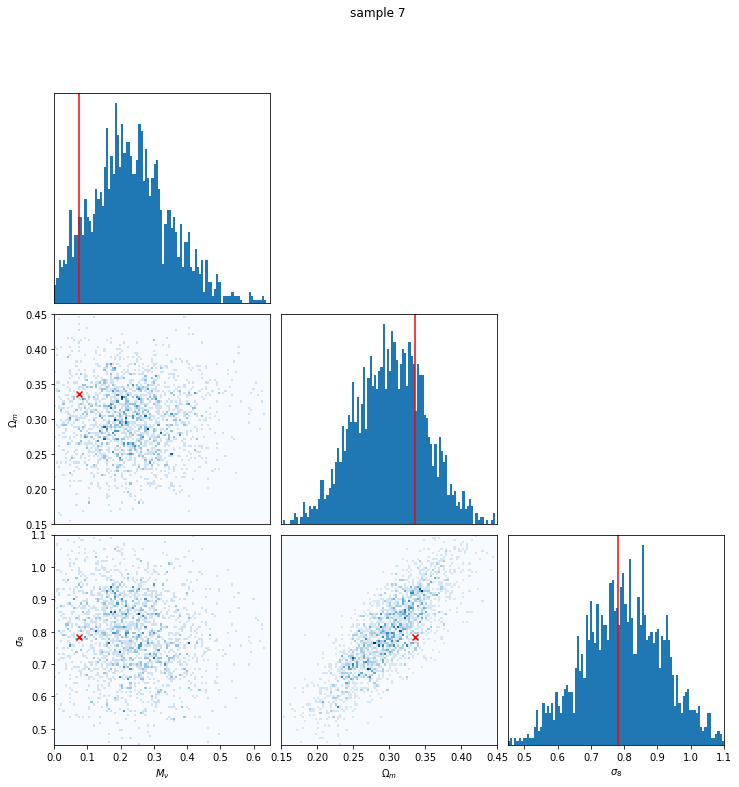

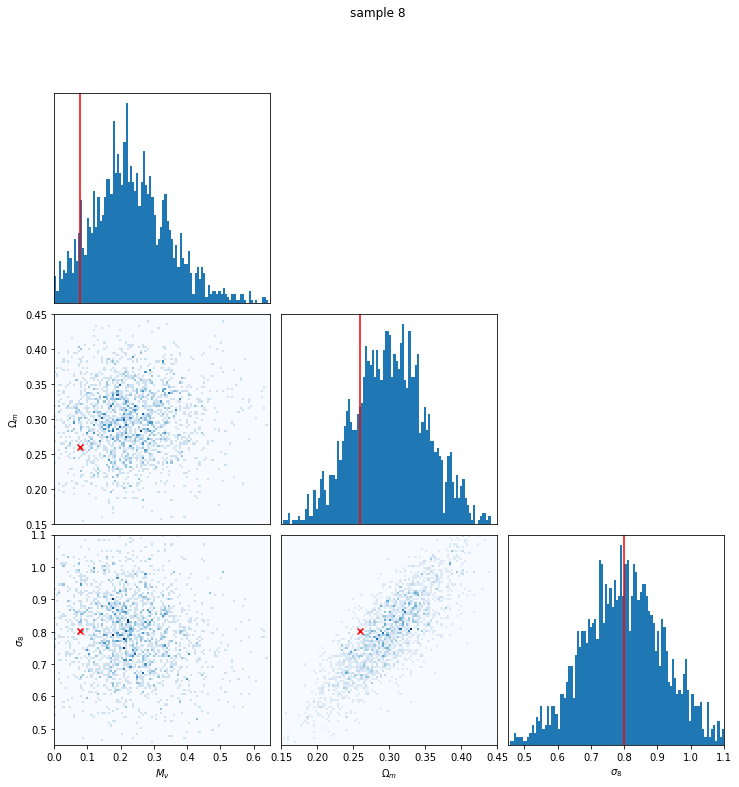

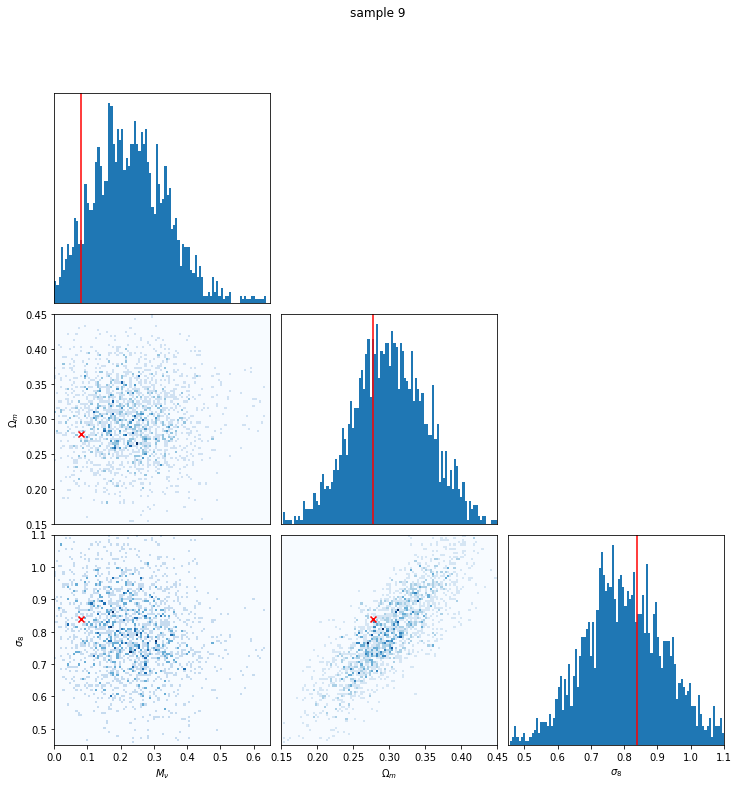

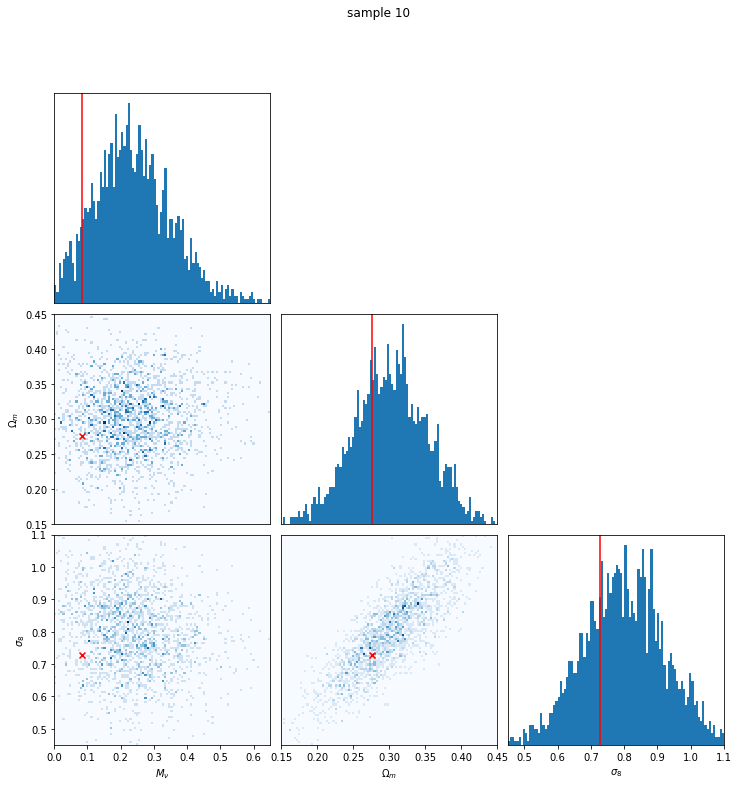

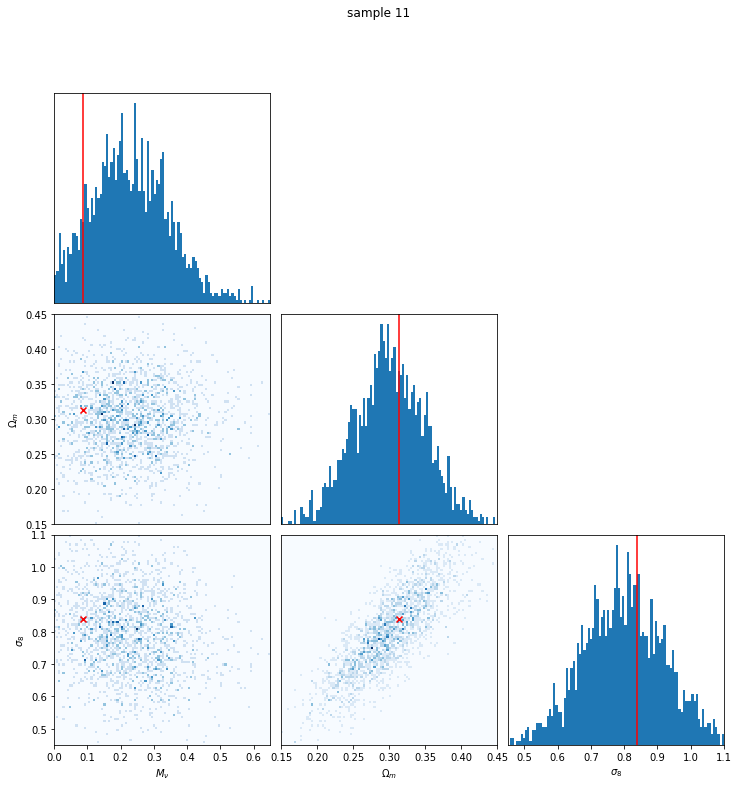

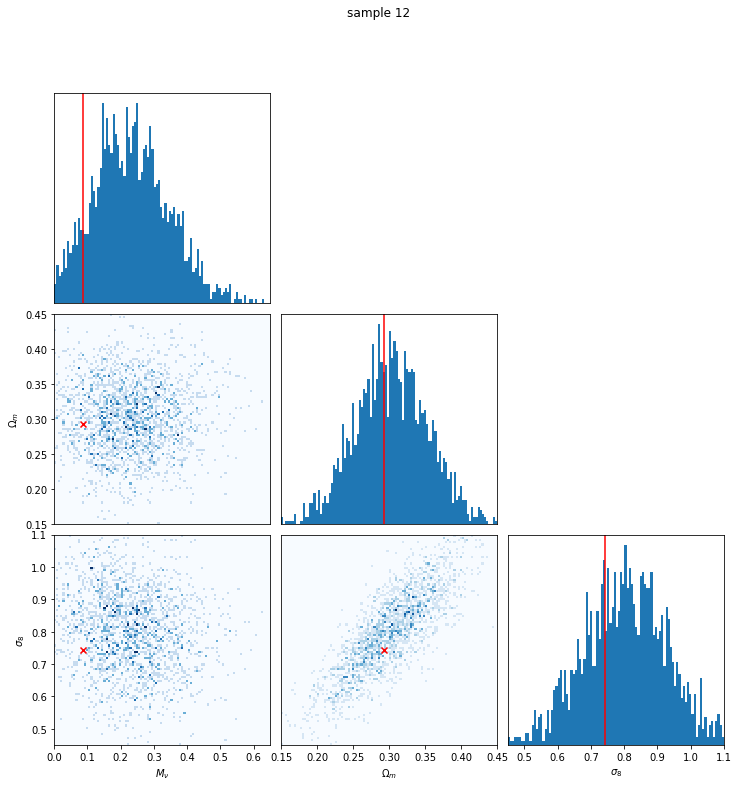

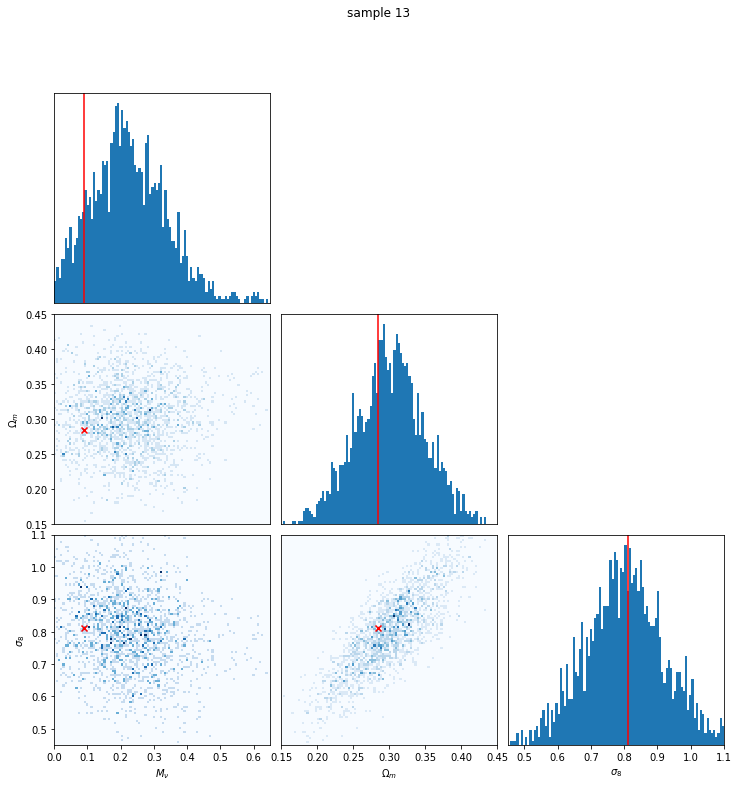

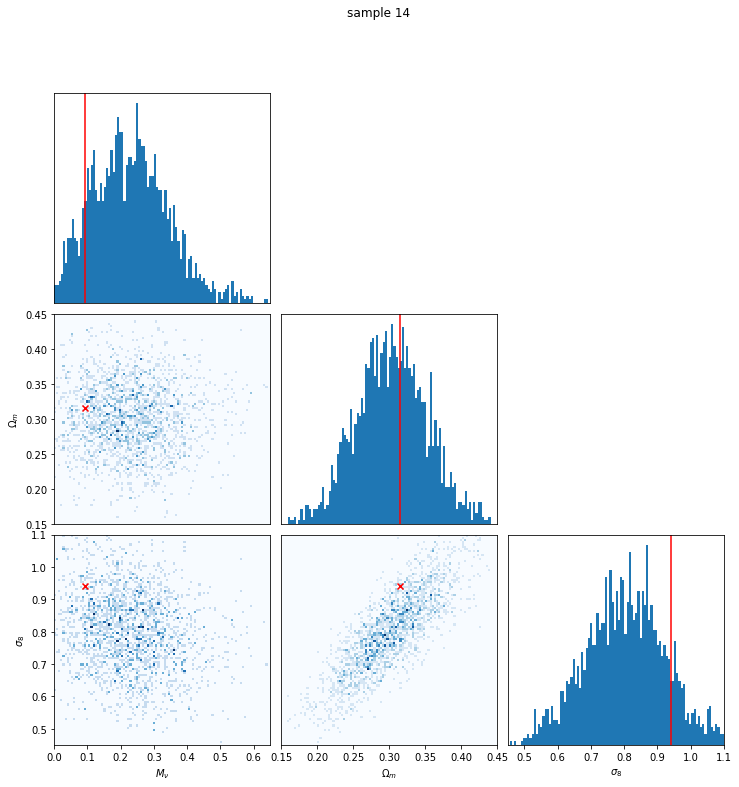

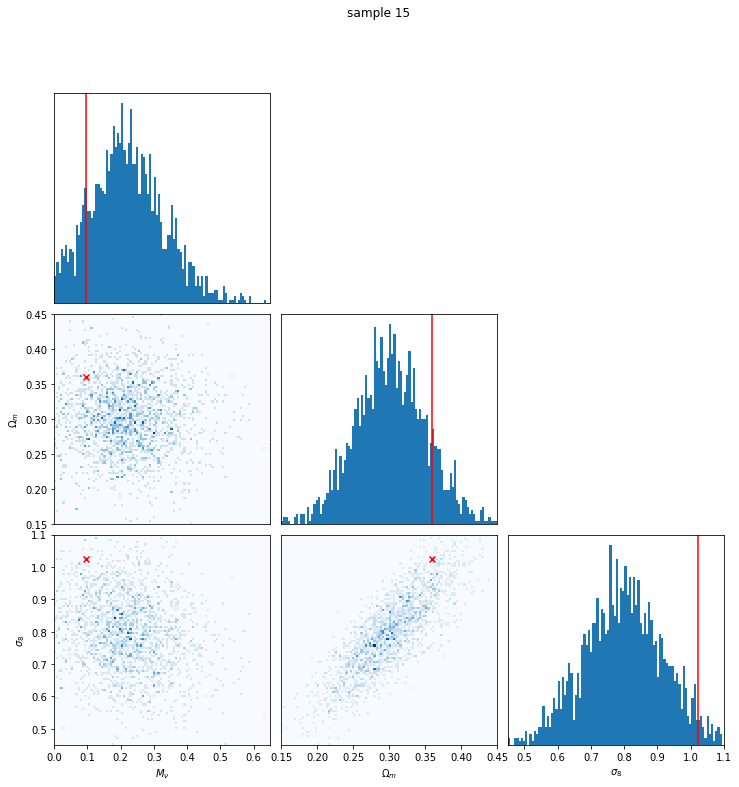

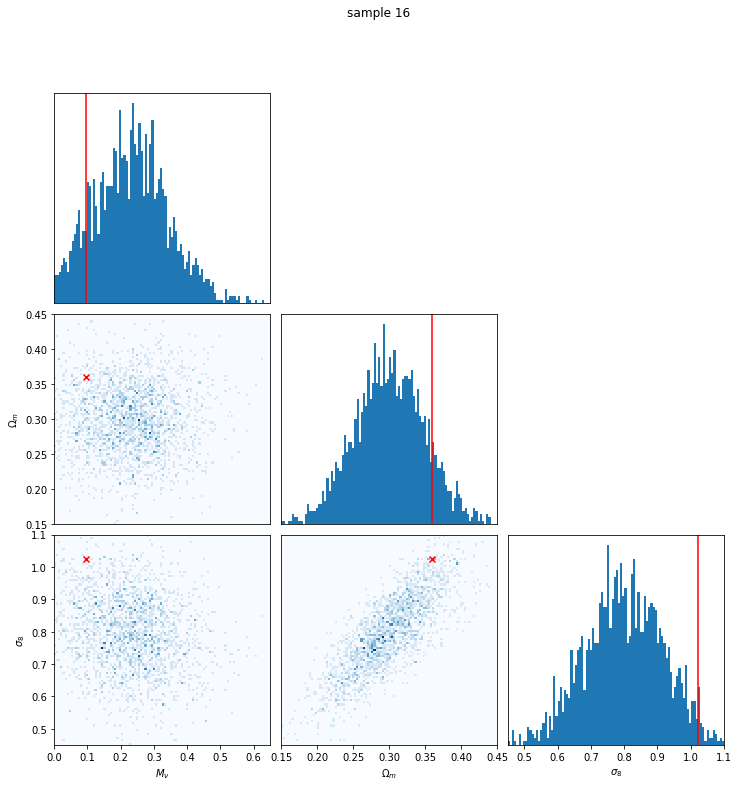

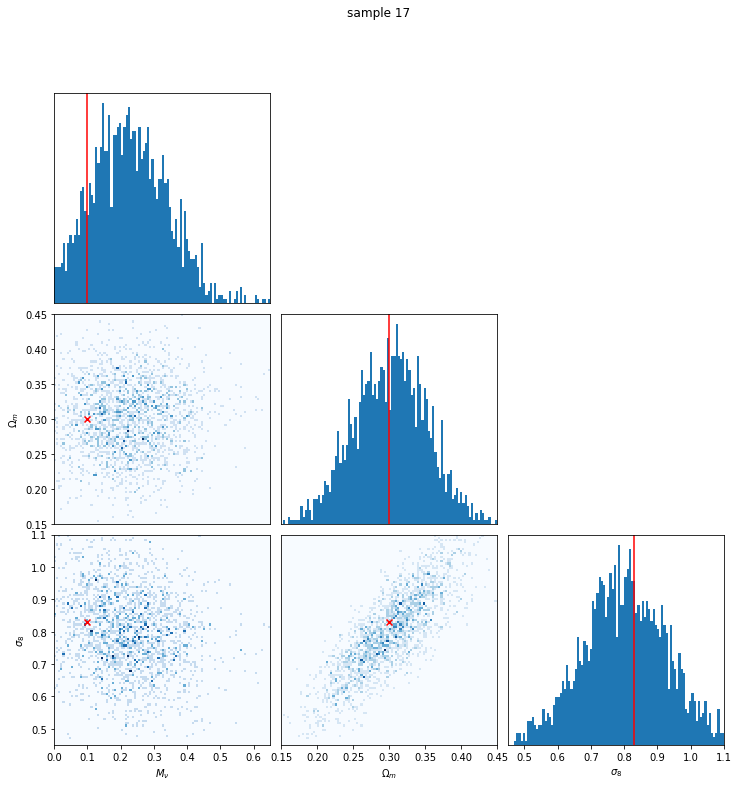

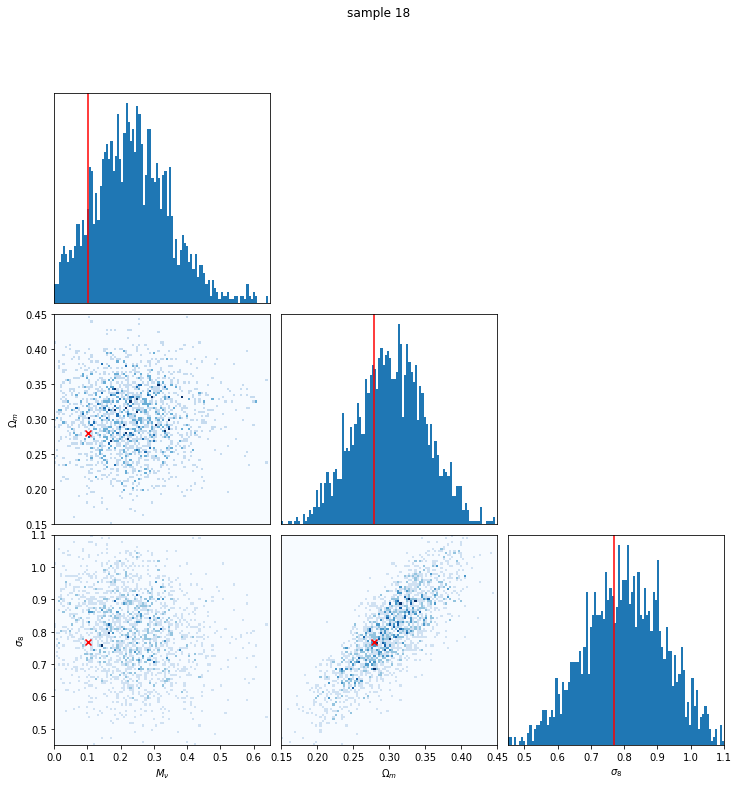

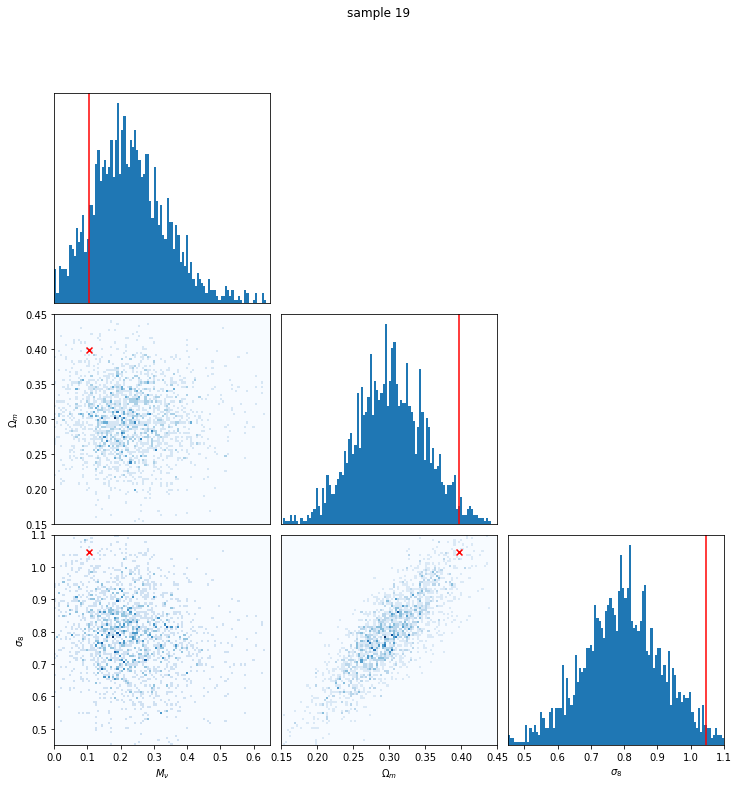

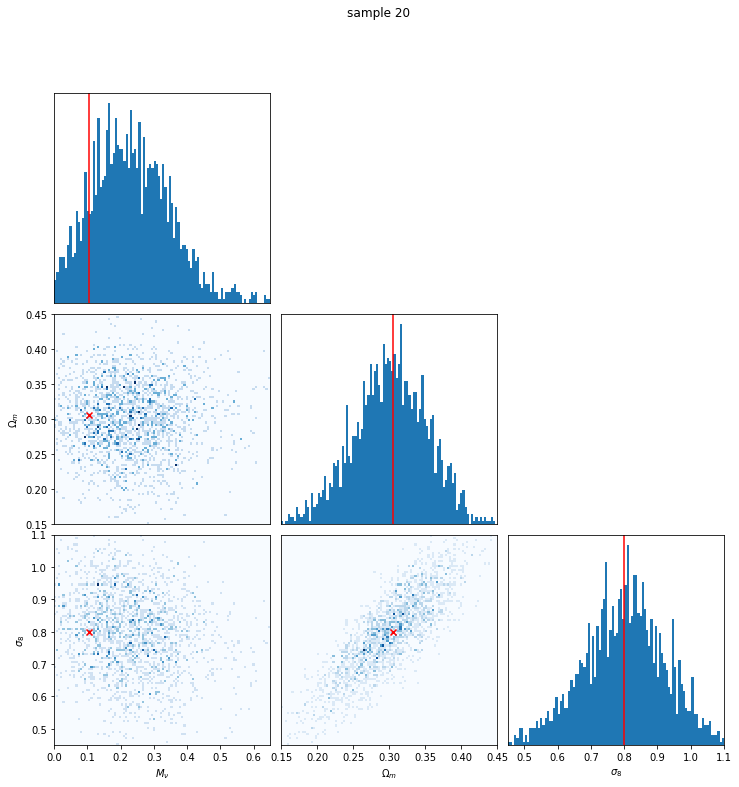

In [17]:
for i in range(20):
    next(post)